# EDA Case Study on Bank Loan

In [1]:
# importing all the necessry libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# To increase the display size for rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
# Reading the application CSV dataset
df1=pd.read_csv(r"application_data.csv")
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# Reading the shape
df1.shape

(307511, 122)

In [6]:
# checking statistics
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
## Finding columns with greater than 40 % null values 
null_column =round((df1.isnull().sum()/len(df1))*100,4) 
null_column_40 = null_column[null_column.values > 40.0000]
null_column_40

OWN_CAR_AGE                     65.9908
EXT_SOURCE_1                    56.3811
APARTMENTS_AVG                  50.7497
BASEMENTAREA_AVG                58.5160
YEARS_BEGINEXPLUATATION_AVG     48.7810
YEARS_BUILD_AVG                 66.4978
COMMONAREA_AVG                  69.8723
ELEVATORS_AVG                   53.2960
ENTRANCES_AVG                   50.3488
FLOORSMAX_AVG                   49.7608
FLOORSMIN_AVG                   67.8486
LANDAREA_AVG                    59.3767
LIVINGAPARTMENTS_AVG            68.3550
LIVINGAREA_AVG                  50.1933
NONLIVINGAPARTMENTS_AVG         69.4330
NONLIVINGAREA_AVG               55.1792
APARTMENTS_MODE                 50.7497
BASEMENTAREA_MODE               58.5160
YEARS_BEGINEXPLUATATION_MODE    48.7810
YEARS_BUILD_MODE                66.4978
COMMONAREA_MODE                 69.8723
ELEVATORS_MODE                  53.2960
ENTRANCES_MODE                  50.3488
FLOORSMAX_MODE                  49.7608
FLOORSMIN_MODE                  67.8486


In [8]:
## Droping the columns more than 40%  null values 
null_column_40 = list(null_column_40.index)
df1.drop(labels=null_column_40,axis=1,inplace=True)

In [9]:
## After anlysing we found many more columns that is not required for the analysis and dropping the same.
list1=['NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','DAYS_ID_PUBLISH','FLAG_MOBIL',
           'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_CONT_MOBILE','FLAG_EMAIL',
           'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
           'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
           'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',   
           'OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
           'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
           'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
           'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
            'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
df1.drop(labels=list1,axis=1,inplace=True)

In [10]:
# Checking data types.
df1.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
ORGANIZATION_TYPE              object
EXT_SOURCE_2                  float64
EXT_SOURCE_3                  float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CRED

In [11]:
# Checking for number of unique data in each column
df1.nunique().sort_values()

TARGET                             2
NAME_CONTRACT_TYPE                 2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
CODE_GENDER                        3
NAME_EDUCATION_TYPE                5
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
OCCUPATION_TYPE                   18
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_YEAR        25
ORGANIZATION_TYPE                 58
EXT_SOURCE_3                     814
AMT_GOODS_PRICE                 1002
AMT_INCOME_TOTAL                2548
AMT_CREDIT                      5603
DAYS_EMPLOYED                  12574
AMT_ANNUITY                    13672
DAYS_BIRTH                     17460
EXT_SOURCE_2                  119831
S

In [12]:
## Numeric convertion
num_col=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH',
                'DAYS_EMPLOYED','EXT_SOURCE_2','EXT_SOURCE_3']
df1[num_col]=df1[num_col].apply(pd.to_numeric)

## Handling missing values and invalid data 


In [14]:
##  Column -> OCCUPATION_TYPE
df1.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

* As we cannot predict the Organization type of missing data, leaving missing values as it is .

In [15]:
## Column EXT_SOURCE_2 and 3
print(df1.EXT_SOURCE_3.describe())
print(df1.EXT_SOURCE_3.describe())

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64
count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


* External source date are normalized source information and imputing with with wrong values may impact the analysis. So leaving the missing values.

In [16]:
## Columns -> AMT_REQ_CREDIT_BUREAU.*
print(df1.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts())
print(df1.AMT_REQ_CREDIT_BUREAU_DAY.value_counts())
print(df1.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts())
print(df1.AMT_REQ_CREDIT_BUREAU_MON.value_counts())
print(df1.AMT_REQ_CREDIT_BUREAU_QRT.value_counts())
print(df1.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts())

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0 

* Other than AMT_REQ_CREDIT_BUREAU_YEAR field all other Bureau fields majority of the records are having zero calls to the customer care.

In [17]:
## Column -> AMT_ANNUITY
df1.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [18]:
 ## The max and mean are having huge difference, so we are imputing with median
df1.loc[df1['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=df1['AMT_ANNUITY'].median()

In [18]:
## Column ->AMT_GOODS_PRICE
df1.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [19]:
## filling the missing values with mean 
df1.loc[df1['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=df1['AMT_GOODS_PRICE'].mean()

In [20]:
## Column -> CNT_FAM_MEMBERS
df1.loc[df1['CNT_FAM_MEMBERS'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,538396.207429,Commercial associate,Lower secondary,Unknown,Municipal apartment,-12396,-1161,Managers,NaN,Insurance,0.700618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,538396.207429,Commercial associate,Higher education,Unknown,House / apartment,-12844,-232,Accountants,NaN,Business Entity Type 2,0.645168,0.670652,0.0,0.0,0.0,0.0,0.0,1.0


* Only 2 records with null values, whome they doesnot have any payment difficulties as well as family status is known. So we are imputing it with default value 1

In [20]:
# Replacing with 1 for missing values.
df1['CNT_FAM_MEMBERS'].fillna(1.0,inplace=True)

In [22]:
## Column -> CODE_GENDER
df1.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [21]:
##  We need to convert this column to numeric which will be a good field for correlation. 
## So converting to 0 and 1 ( Male and Female ). XNA as 1.
df1['CODE_GENDER'].replace({"F":1, "M":0,"XNA":1}, inplace=True)
df1['CODE_GENDER']=df1['CODE_GENDER'].astype(int)

In [22]:
## Convertion Y/N to 1 and 0 respectively for OWN_CAR and OWN_REALTY as these two fields are good for 
## correlation analyis( correlation consider only numeric fields)
df1['FLAG_OWN_CAR'].replace({"Y":1, "N":0}, inplace=True)
df1['FLAG_OWN_REALTY'].replace({"Y":1, "N":0}, inplace=True)


In [25]:
## Column -> FAMILY_STATUS
df1.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [26]:
## When we took unknown family status, cannot impute as number of children is unknown and retaining as unknown itself
df1[df1['NAME_FAMILY_STATUS']=="Unknown"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
41982,148605,0,Revolving loans,0,0,1,0,450000.0,675000.0,33750.0,538396.207429,Commercial associate,Lower secondary,Unknown,Municipal apartment,-12396,-1161,Managers,1.0,Insurance,0.700618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187348,317181,0,Revolving loans,1,0,1,0,202500.0,585000.0,29250.0,538396.207429,Commercial associate,Higher education,Unknown,House / apartment,-12844,-232,Accountants,1.0,Business Entity Type 2,0.645168,0.670652,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
## Column -> ORGANIZATION_TYPE
df1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [23]:
## The second manjority is 'XNA' for Organization type . However we cannot convert to any valid values, so converting 
## them to Nan. However it will increase the NaN to 18%
df1.loc[df1['ORGANIZATION_TYPE'] == 'XNA', 'ORGANIZATION_TYPE'] = np.NaN

In [24]:
## Checking Days birth and days employed fields
print(df1['DAYS_BIRTH'].value_counts())
print(df1['DAYS_EMPLOYED'].value_counts())

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-25032     1
-7956      1
-8001      1
-7861      1
-24894     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64
 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-11115         1
-11371         1
-11883         1
-13536         1
-8795          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64


* Days of birth and Days employed are in negative. We need to convert them to positive
* There is no outliers in Days of birth.  
* Adding one more column age group for our analysis

In [25]:
## adding a new column called  age group. Takking the floor value of 'Age' to get in integers.
df1['AGE']=abs(df1["DAYS_BIRTH"]//365)
slots = ['0-20','20-30','30-40','40-50','50-60','60-70','70 and above']
bins = [0,20,30,40,50,60,70,100]
df1['AGE_GROUP']=pd.cut(df1['AGE'],bins,labels=slots)

In [26]:
#Removing the column Age
df1=df1.drop('AGE',axis=1)

In [27]:
## Majority of the records with 365243 are without payment difficulties. May be it is a default or maxiumum value. 
## So filling with Nan
df1.loc[df1['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = np.nan

Text(0.5, 0, 'Days of Employment')

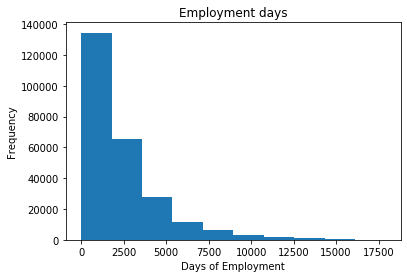

In [33]:
# Plotting to see the Days employed column
abs(df1['DAYS_EMPLOYED']).plot.hist(title = 'Employment days')
plt.xlabel('Days of Employment')

In [28]:
## adding a new column with years of experience . Taking the floor value to get as integer.
df1["YEARS_EXPERIENCE"]=abs(df1["DAYS_EMPLOYED"]//365)

In [29]:
# Removing days employed and days birth as they are not required for the analysis
df1=df1.drop('DAYS_EMPLOYED',axis=1)
df1=df1.drop('DAYS_BIRTH',axis=1)

In [30]:
## Since we have different income category of people it is good to bin the income slot to do the analysis. 
## Adding a new column to see the income range.
slots = ['0-50000','50000-100000','100000-150000', '150000-200000','200000-250000','250000-300000',
        '300000-350000','350000-400000','400000-450000','450000-500000','500000 and above']
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
df1['AMT_INCOME_RANGE']=pd.cut(df1['AMT_INCOME_TOTAL'],bins,labels=slots)

### Handling outliers

In [37]:
## Checking for Outliers in AMT_ANNUITY and AMT_GOODS_PRICE columns.
print(df1['AMT_ANNUITY'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95,0.99,0.999,1]))
print(df1['AMT_GOODS_PRICE'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,.95,.99,.999,1]))

0.000      1615.5
0.100     11074.5
0.200     14701.5
0.300     18189.0
0.400     21870.0
0.500     24903.0
0.600     28062.0
0.700     32004.0
0.800     37516.5
0.900     45954.0
0.950     53325.0
0.990     70006.5
0.999    110047.5
1.000    258025.5
Name: AMT_ANNUITY, dtype: float64
0.000      40500.0
0.100     180000.0
0.200     225000.0
0.300     270000.0
0.400     378000.0
0.500     450000.0
0.600     526500.0
0.700     675000.0
0.800     814500.0
0.900    1093500.0
0.950    1305000.0
0.990    1800000.0
0.999    2250000.0
1.000    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64


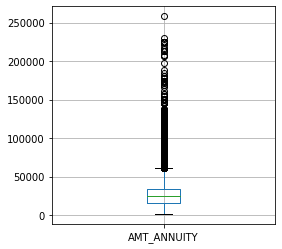

In [38]:
# Vizualising the outliers for AMT_ANNUITY
df1.boxplot(column='AMT_ANNUITY',figsize=(4,4))

In [39]:
# Identifyin the record with max value.
df1.loc[df1['AMT_ANNUITY'] >= 258025.5]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,YEARS_EXPERIENCE,AMT_INCOME_RANGE
17948,120926,0,Cash loans,0,1,0,2,783000.0,4050000.0,258025.5,4050000.0,Commercial associate,Higher education,Married,House / apartment,Managers,4.0,Industry: type 4,0.706927,0.553165,0.0,0.0,0.0,0.0,0.0,0.0,40-50,1.0,500000 and above


* There are outliers in both columns, but when we check the maximum value, for both column it is the same record. He has highter education with 1 year experience only.So this records need to be removed.

Text(0.5, 1.0, ' Annuity vs Credit')

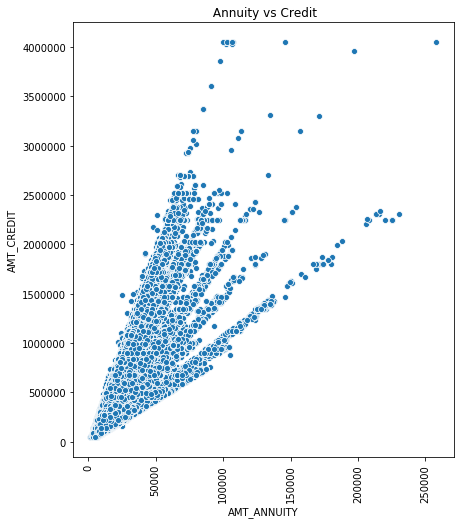

In [40]:
## Vizualising Amount Annuity and Credit via scatter plot
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
p=sns.scatterplot(x="AMT_ANNUITY", y="AMT_CREDIT", data=df1)
plt.xticks(rotation='vertical')
#plt.ylabel(" Counts")
plt.title(" Annuity vs Credit")

* AMT Annuity and Credit showing a linear relationship and it is good to procced with this data.

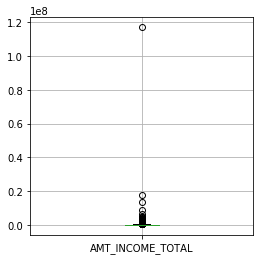

In [41]:
## Checking for outliers in AMT_INCOME_TOTAL
df1.boxplot(column='AMT_INCOME_TOTAL',figsize=(4,4))

In [42]:
#Checking what is the occupation type of the person with lowest AMT_INCOME_TOTAL
df1.loc[df1['AMT_INCOME_TOTAL'] == df1['AMT_INCOME_TOTAL'].min(), ['AMT_INCOME_TOTAL','OCCUPATION_TYPE']]

,AMT_INCOME_TOTAL,OCCUPATION_TYPE
1678,25650.0,Cleaning staff
20727,25650.0,NaN


The cleaning Staff is a valid data for minimum value

In [43]:

#Checking what is the occupation type of the person with highest AMT_INCOME_TOTAL
df1.loc[df1['AMT_INCOME_TOTAL'] == df1['AMT_INCOME_TOTAL'].max(), ['AMT_INCOME_TOTAL','OCCUPATION_TYPE']]

,AMT_INCOME_TOTAL,OCCUPATION_TYPE
12840,117000000.0,Laborers


   This is clearly evident that a laborers cannot be in the highest salary category. This is a true outlier and we need        to remove it, so we need to analyse more with Zscore method

In [44]:
## Handling outliers using Zscore appraoch - Finding the rows which are more than 3 standard deviation from the Mean. 
from scipy import stats
out= df1[np.abs(stats.zscore(df1['AMT_INCOME_TOTAL'])) >3]
print(len(out))

454


There are 454 records which shows outliers those needs to be removed.

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64


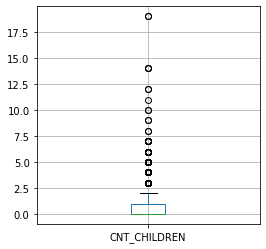

In [45]:
## Analysing CNT_CHILDREN 
print(df1.CNT_CHILDREN.value_counts())
df1.boxplot(column='CNT_CHILDREN',figsize=(4,4))

* There are few outliers in CNT_CHILDREN column .The people who has highest number of children are non married. 
* Also people with more than 10 kids few are not married. 
* We anticipate that those people might be running charity.
* Out of which only 1 person has payment difficulties.


count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


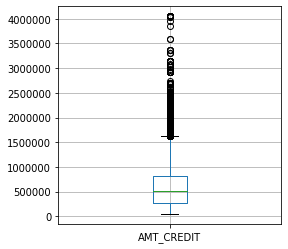

In [46]:
## Analysing AMT_CREDIT column
print(df1.AMT_CREDIT.describe())
df1.boxplot(column='AMT_CREDIT',figsize=(4,4))

In [47]:
df1.loc[df1['AMT_CREDIT'] == df1['AMT_CREDIT'].max(), ['AMT_CREDIT','OCCUPATION_TYPE']]

,AMT_CREDIT,OCCUPATION_TYPE
14852,4050000.0,Managers
17948,4050000.0,Managers
110459,4050000.0,Managers
119681,4050000.0,Managers
120757,4050000.0,NaN
133766,4050000.0,Managers
287732,4050000.0,Accountants
288455,4050000.0,Managers


Credit amount maximum for managers and Acccounts which looks valid data.

##  Checking Imbalance in data

In [48]:
## Checking the imbalance with Target column
(df1.TARGET.sum()/len(df1))*100

8.072881945686495

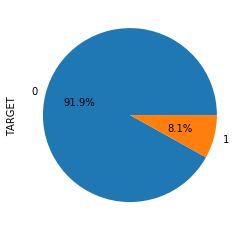

In [49]:
## Vizualising the % of Defaulters vs Non Defaulters in the dataset.
## 1 indicates Defaulters and 0 indicates non defaulters.
df1.TARGET.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

In [31]:
### Imbalance ratio
target0_df=df1.loc[df1["TARGET"]==0]
target1_df=df1.loc[df1["TARGET"]==1]
ratio=round(len(target0_df)/len(target1_df),2)
print("Imbalance ratio from Defaulters to non Defaulters is -> 1 :",ratio)

Imbalance ratio from Defaulters to non Defaulters is -> 1 : 11.39


# Univarate Analysis

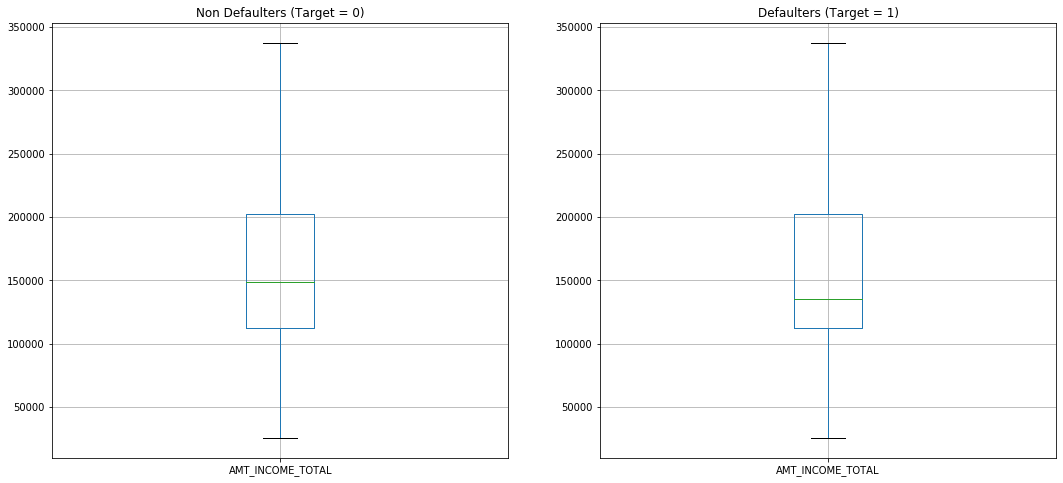

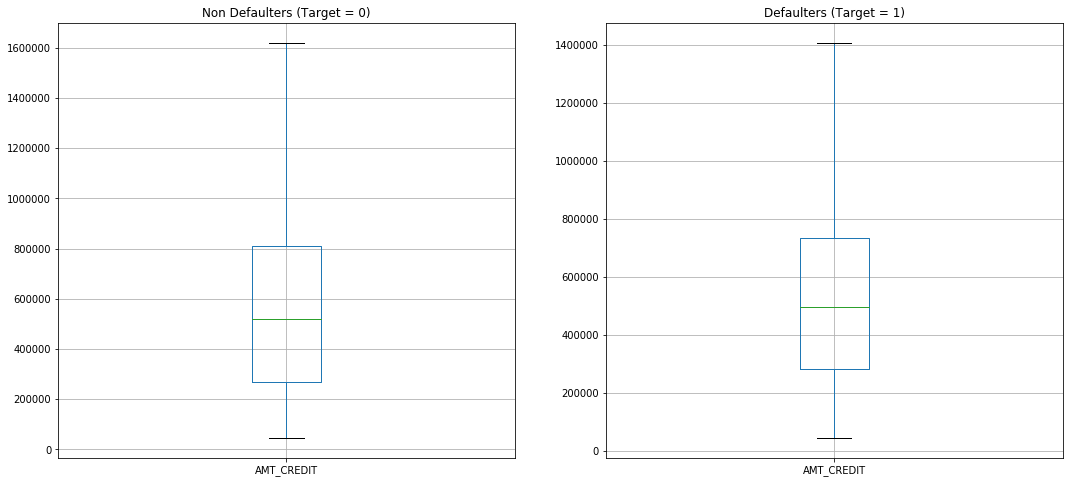

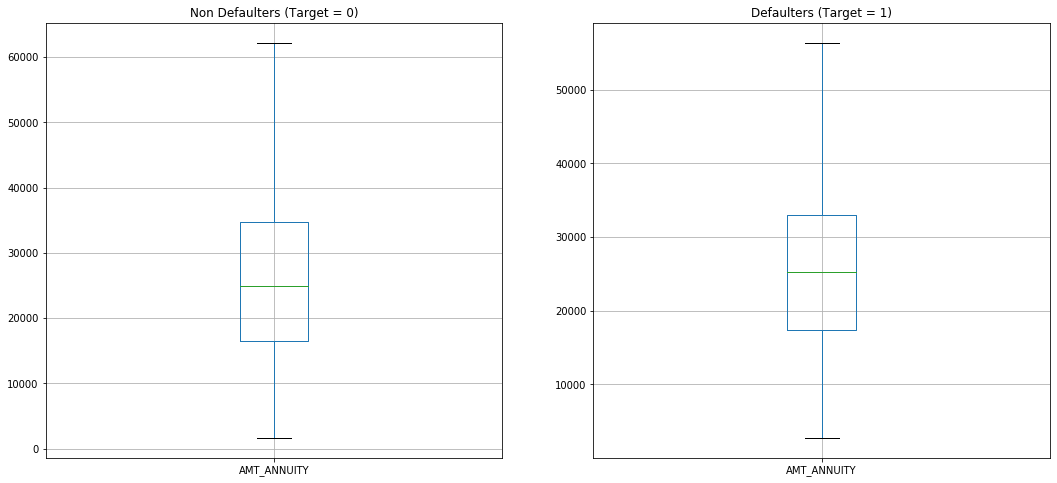

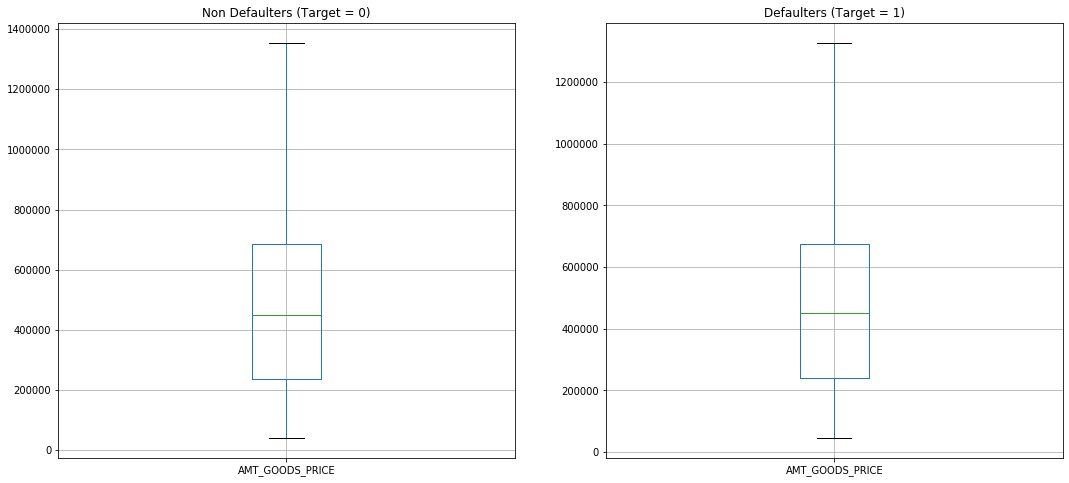

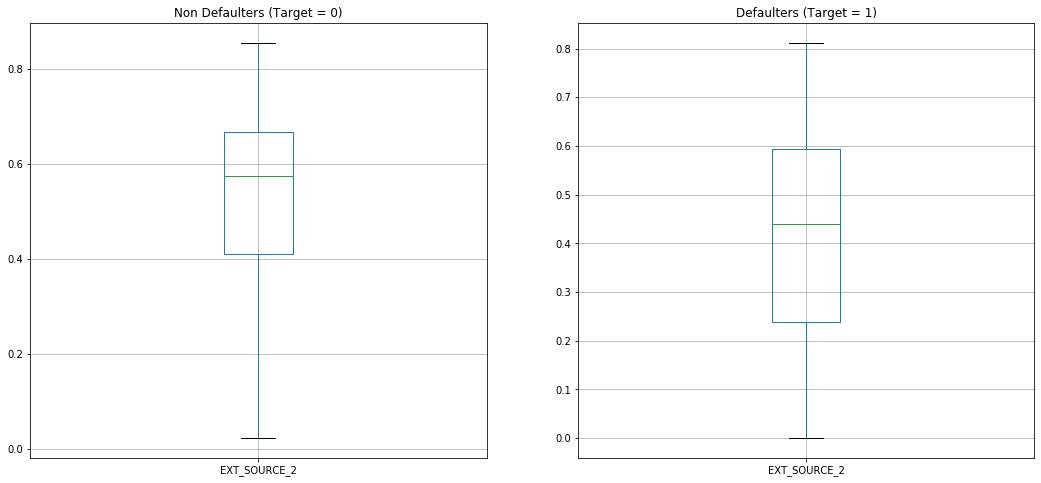

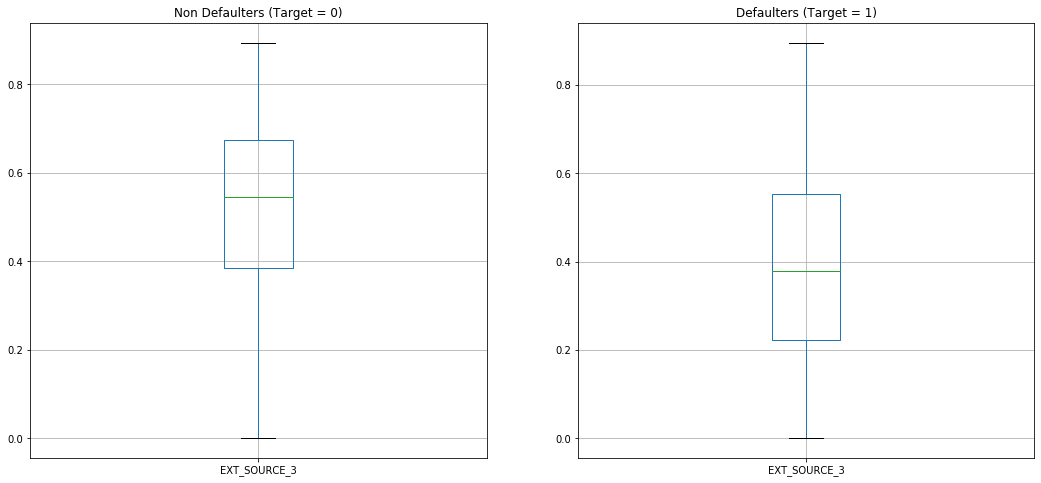

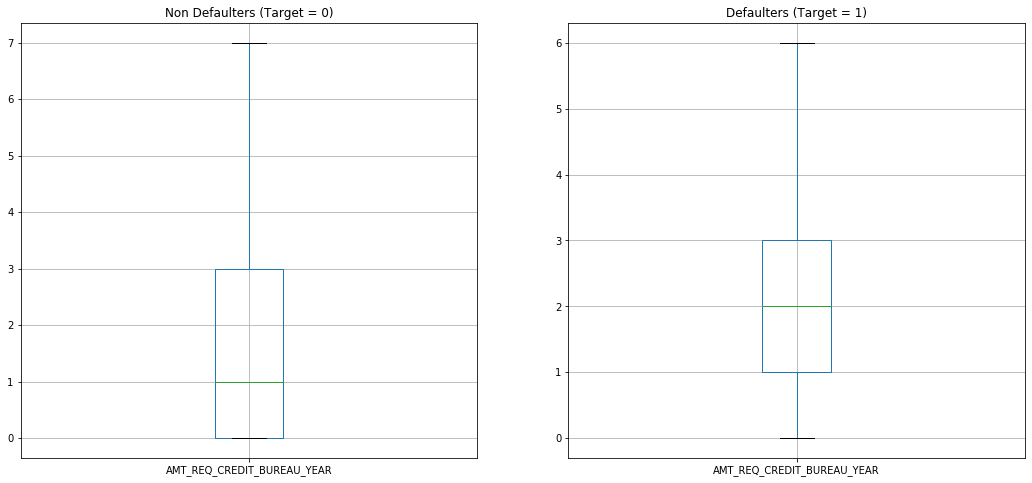

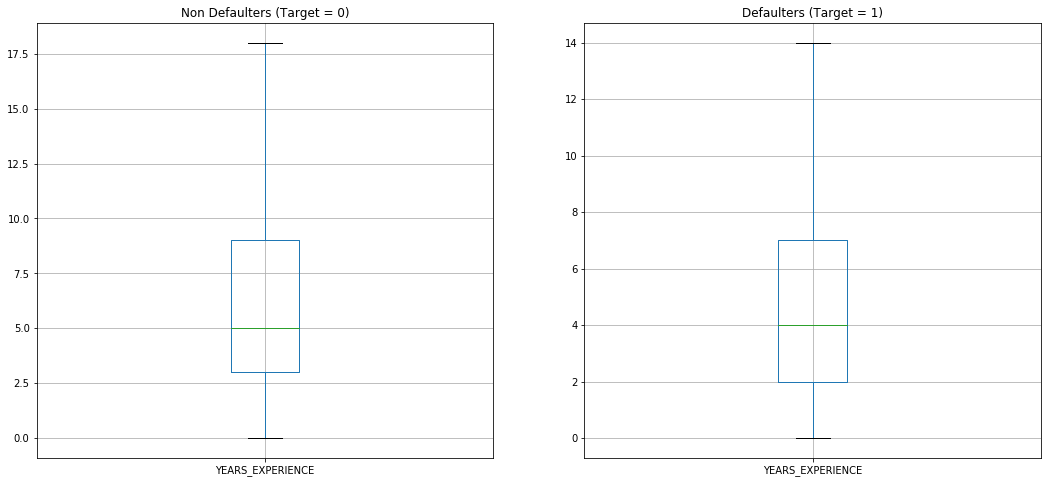

In [32]:
## Univarte Analysis of AMOUNT/EXT/BUREAU/Years fields
col = ['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_YEAR','YEARS_EXPERIENCE']
# Plotting using box plot.. Removing the oulliers using showfliers command
for i in col:
    plt.figure(figsize=(18,8))
    plt.subplot(1,2,1)
    target0_df.boxplot(column=i,showfliers=False)
    plt.title('Non Defaulters (Target = 0)')
    plt.subplot(1,2,2)
    target1_df.boxplot(column=i,showfliers=False)
    plt.title('Defaulters (Target = 1)')


Concluding the below points from the above plots.

* Cannot predict anything from the fields AMT_GOODS_PRICE and AMT_ANNUITY as the distribution is almost same for both defaulters and non defaulters.
*  For defaulters,Total income range in mostly in Quardile 3 from 1.35 lkahs to 2 lakhs.
*  The credit amount is a little lesser for defaulters than non defaulters.
*  EXT_SOURCE_2, median is 5.75 for defaulters and 4.9 for non defaulters.
*  EXT_SOURCE_3 median is 5.5 for  defaulters and 3.9 for non defaulters.
*  Defaulters had more phone calls as the AMT_REQ_CREDIT_BUREAU_YEAR median is 2, where as 1 for non defaulters.
*  For defaulters the jobs is widely in range between 4 to 7, where as it is 5 to 9 in non defaulters.



Text(0.5, 1.0, 'Target = 1')

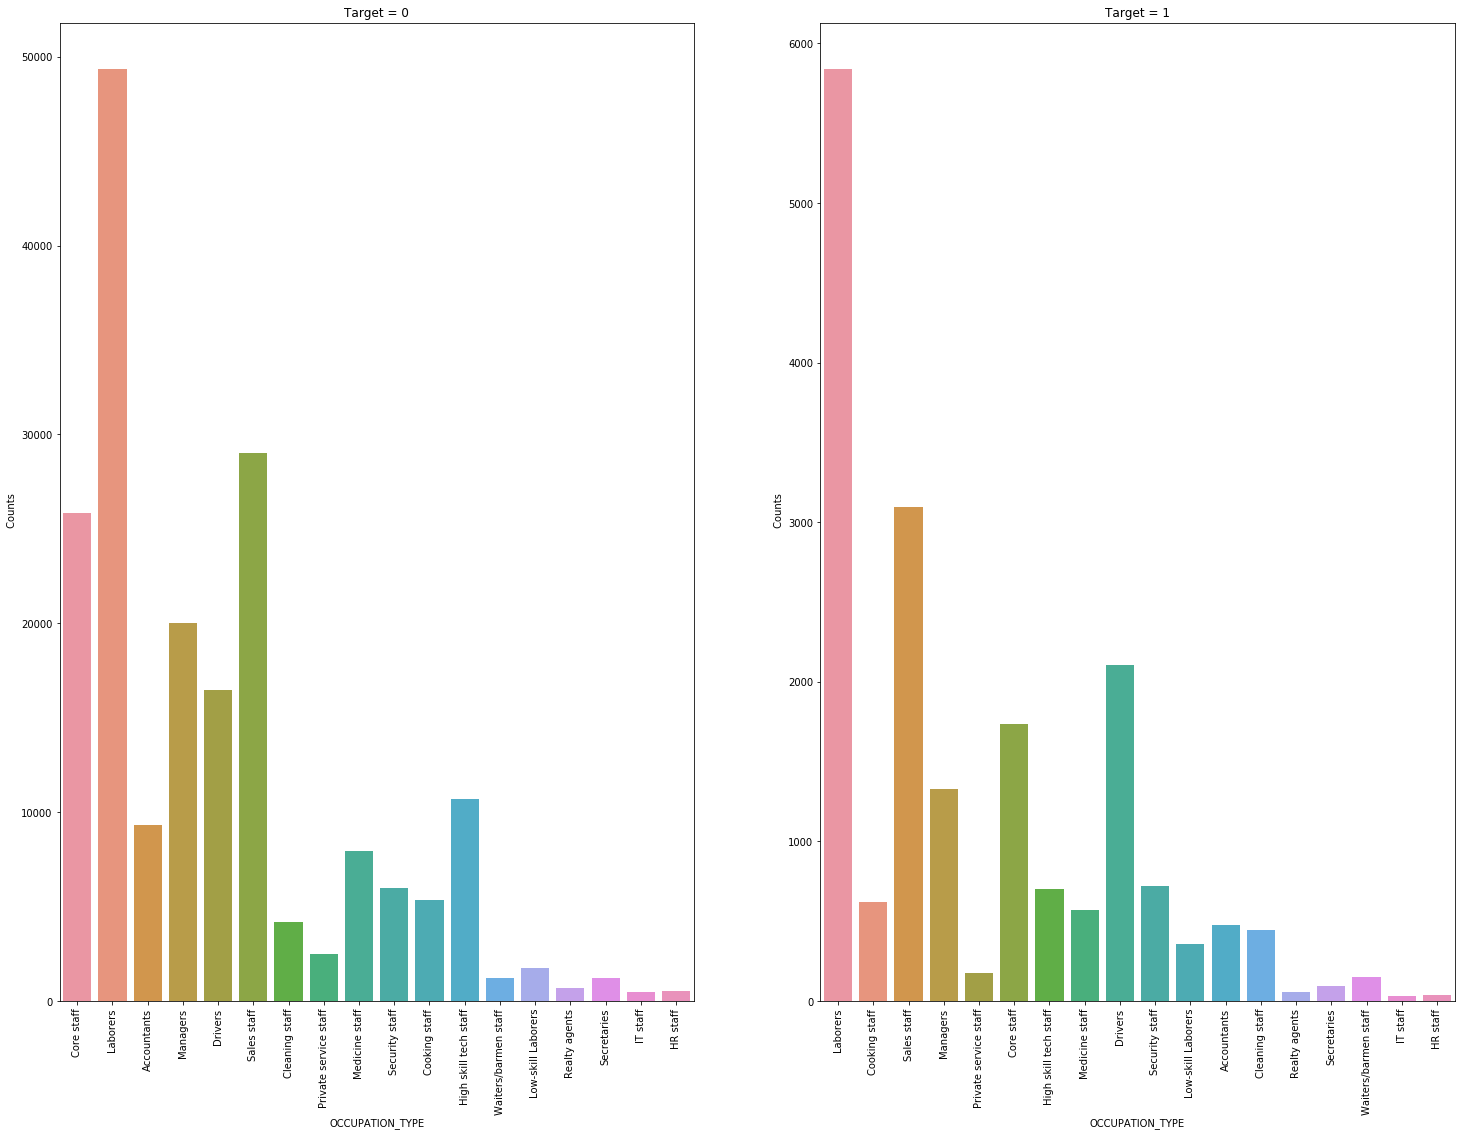

In [52]:
## Univarte analysis on Occupation type
plt.figure(figsize=(25,18))
plt.subplot(1,2,1)
p = sns.countplot(data=target0_df, x= 'OCCUPATION_TYPE')
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target = 0")
plt.subplot(1,2,2)
p = sns.countplot(data=target1_df, x= 'OCCUPATION_TYPE')
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target = 1")


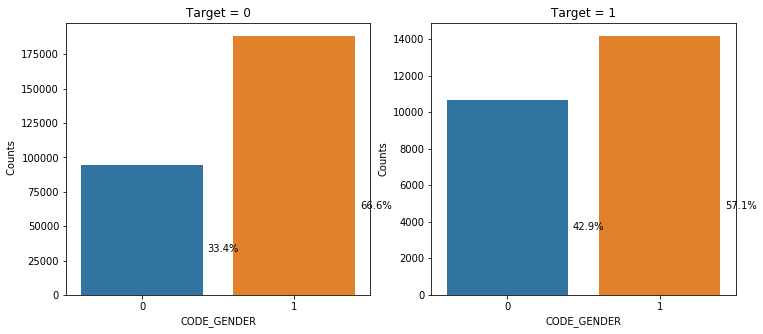

In [53]:
## Univarte analysis on Gender
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax = sns.countplot(data=target0_df, x= 'CODE_GENDER')
plt.ylabel(" Counts")
plt.title("Target = 0")
total = len(target0_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.03
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y))
plt.subplot(1,2,2)
ax = sns.countplot(data=target1_df, x= 'CODE_GENDER')
plt.ylabel("Counts")
plt.title("Target = 1")

total = len(target1_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.03
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y))

Text(0.5, 1.0, 'Target = 1')

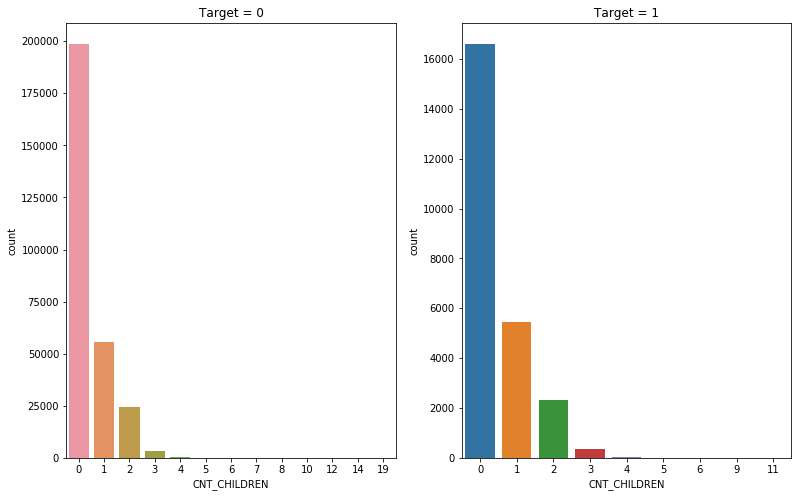

In [54]:
## Univarate Analysis on Number of children
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
p = sns.countplot(data=target0_df, x= 'CNT_CHILDREN')
plt.title("Target = 0")
plt.subplot(1,2,2)
p = sns.countplot(data=target1_df, x= 'CNT_CHILDREN')
plt.title("Target = 1")


Text(0.5, 1.0, 'Target 1')

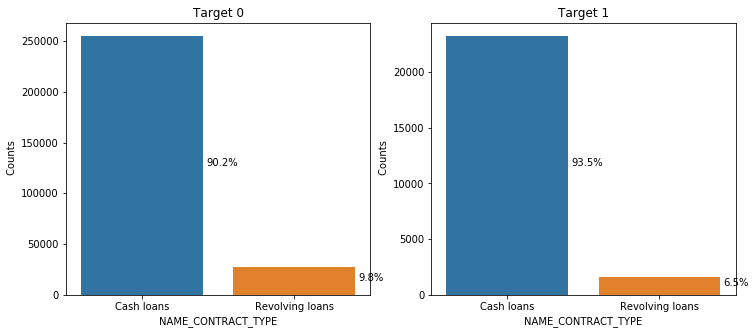

In [55]:
# Univarate analysis on NAME_CONTRACT_TYPE
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax = sns.countplot(data=target0_df, x= 'NAME_CONTRACT_TYPE')
total = len(target0_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
ax = sns.countplot(data=target1_df, x= 'NAME_CONTRACT_TYPE')
total = len(target1_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.ylabel(" Counts")
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

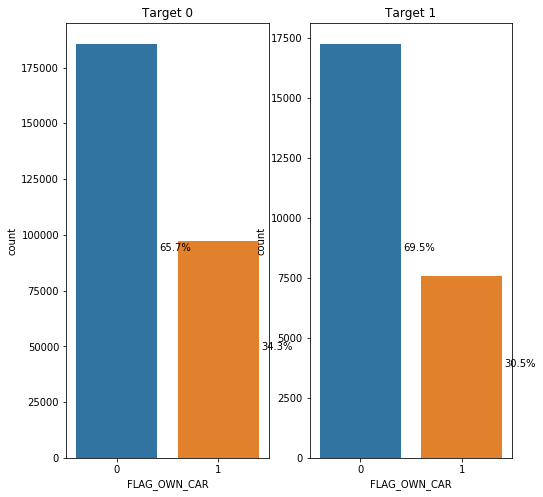

In [56]:
# Univarate analysis on OWN CAR
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
ax = sns.countplot(data=target0_df, x= 'FLAG_OWN_CAR')
total = len(target0_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.title("Target 0")
plt.subplot(1,2,2)
ax = sns.countplot(data=target1_df, x= 'FLAG_OWN_CAR')
total = len(target1_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

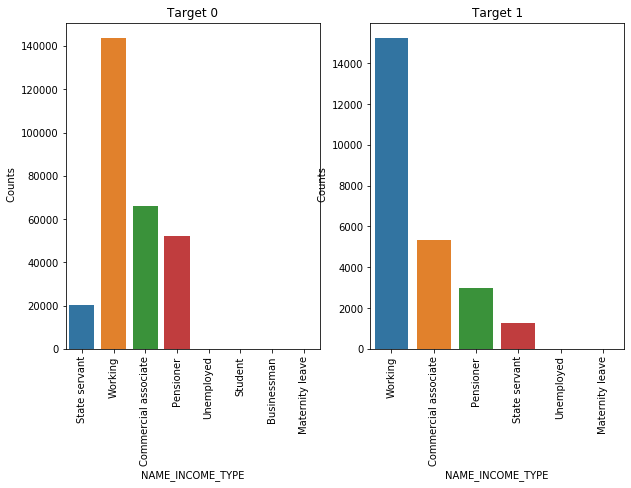

In [57]:
# Univarate analysis on Income Type
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
p = sns.countplot(data=target0_df, x= 'NAME_INCOME_TYPE')
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(data=target1_df, x= 'NAME_INCOME_TYPE')
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

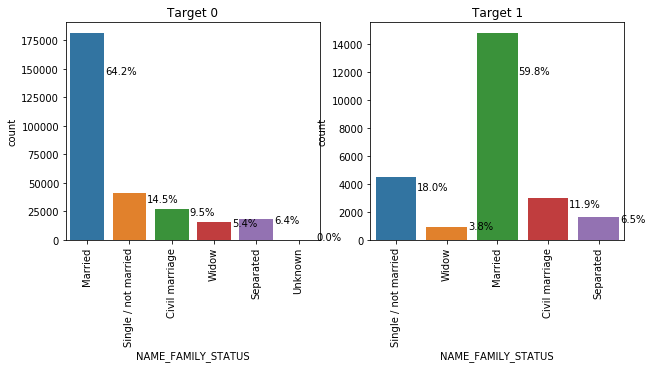

In [58]:
# Univarate analysis on Family Status
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
ax = sns.countplot(data=target0_df, x= 'NAME_FAMILY_STATUS')
plt.xticks(rotation='vertical')

total = len(target0_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/1.25
        ax.annotate(percentage, (x, y))

plt.title("Target 0")
plt.subplot(1,2,2)
ax = sns.countplot(data=target1_df, x= 'NAME_FAMILY_STATUS')
plt.xticks(rotation='vertical')
    

total = len(target1_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/1.25
        ax.annotate(percentage, (x, y))


plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

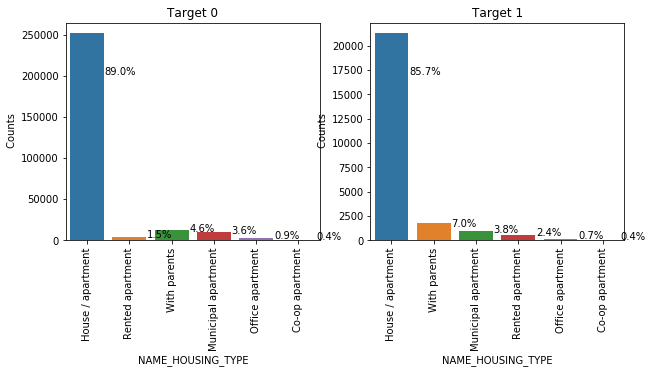

In [59]:
# Univarate analysis on Housing Type
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
ax= sns.countplot(data=target0_df, x= 'NAME_HOUSING_TYPE')


total = len(target0_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/1.25
        ax.annotate(percentage, (x, y))
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
ax = sns.countplot(data=target1_df, x= 'NAME_HOUSING_TYPE')


total = len(target1_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/1.25
        ax.annotate(percentage, (x, y))
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

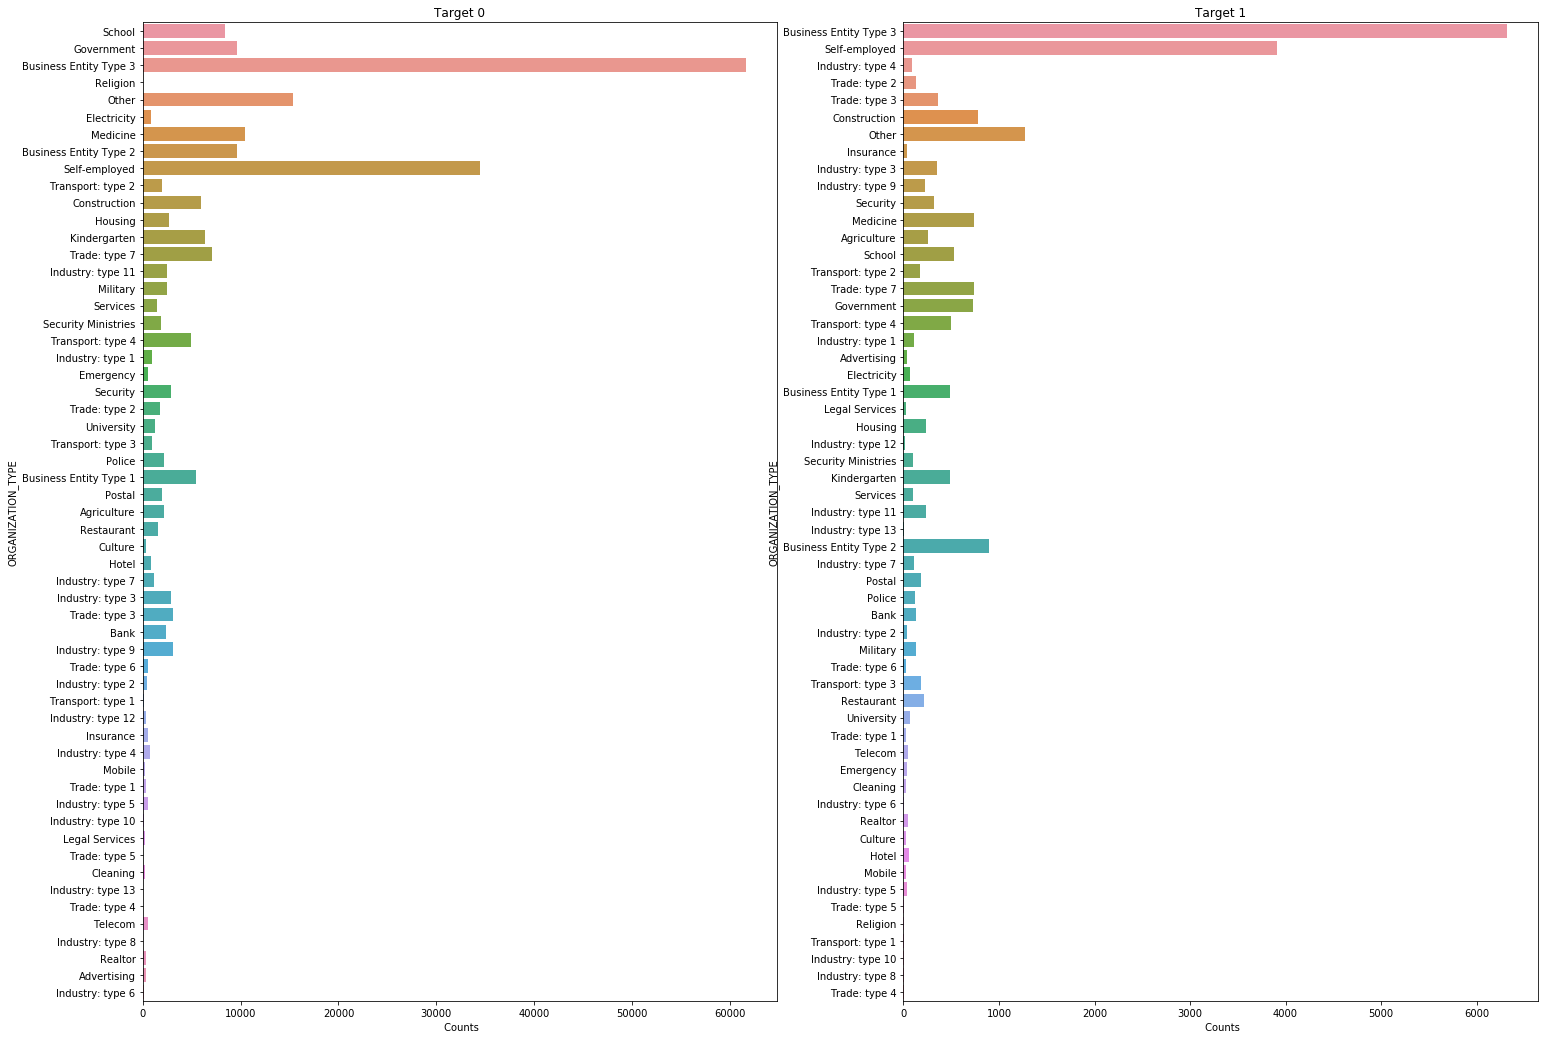

In [60]:
# Univarate analysis on Organization type
plt.figure(figsize=(25,18))
plt.subplot(1,2,1)
p = sns.countplot(data=target0_df, y= 'ORGANIZATION_TYPE')
plt.xlabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(data=target1_df, y= 'ORGANIZATION_TYPE')
plt.xlabel(" Counts")
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

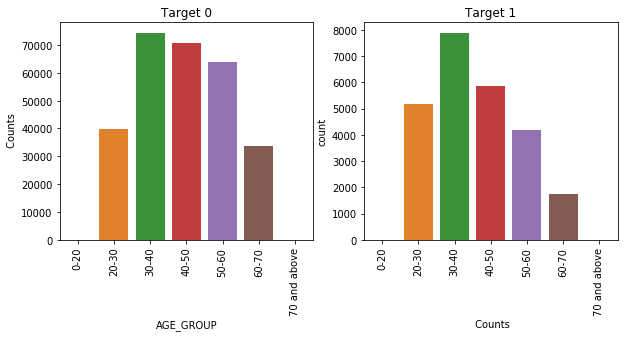

In [61]:
# Univarate analysis on Age group
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
p = sns.countplot(data=target0_df, x= 'AGE_GROUP')
plt.ylabel(" Counts")
plt.xticks(rotation='vertical')
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(data=target1_df, x= 'AGE_GROUP')
plt.xlabel(" Counts")
plt.xticks(rotation='vertical')
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

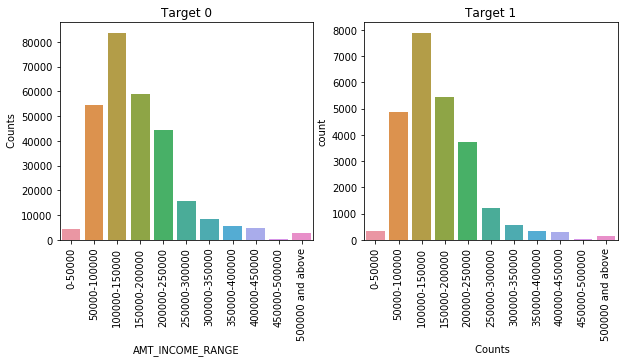

In [62]:
# Univarate analysis on Income Range
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
p = sns.countplot(data=target0_df, x= 'AMT_INCOME_RANGE')
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(data=target1_df, x= 'AMT_INCOME_RANGE')
plt.xticks(rotation='vertical')
plt.xlabel(" Counts")
plt.title("Target 1")

Concluding the below points from  Univariate plots
* Laborers and Sales staff are more tend to take loans in both case .
* Females are more tend to take loans and more likely to be defaulters too.
* People are preferring Cash loans in both categories.
* Number of children is 1 or 0 in both case.
* Married or unmarried are more likely to take loans.
* Working or commercial associcate are more likely to take loans.
* They are mostly living in House/ appartment or with parents.
* Busniness entity 2 and Self employed are more likely to take loans.
* There is no defaulters from income category of Student and Businessman
* All age group from 20 to 70 are taking taking loans and most defaulters are in 30-40 age group.
* Defaulters Income range is mostly distributed betweem 1 lakh to 2 lakh . Lowest defaulters are in 4.5lakhs + category.


# Univarate Segmented Analysis

Text(0.5, 1.0, 'Target 1')

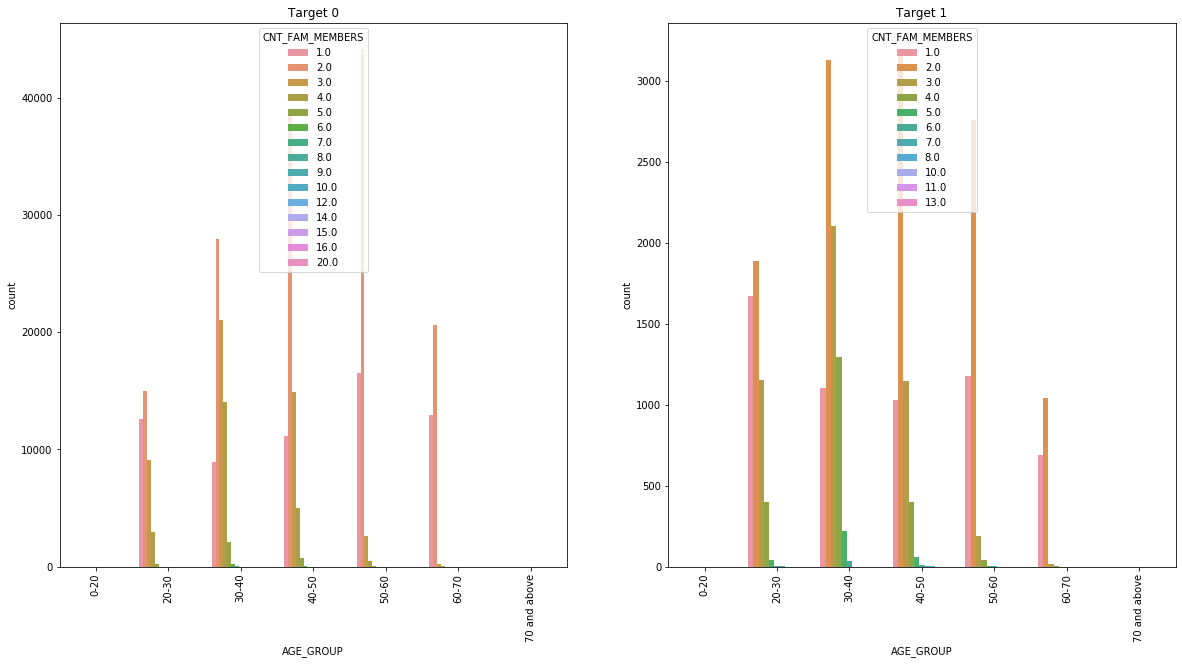

In [63]:
# Univarate analysis of AGE group and Family members
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
p = sns.countplot(x = "AGE_GROUP", hue= 'CNT_FAM_MEMBERS', data = target0_df)
plt.xticks(rotation='vertical')
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(x = "AGE_GROUP", hue= 'CNT_FAM_MEMBERS', data = target1_df)
plt.xticks(rotation='vertical')
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

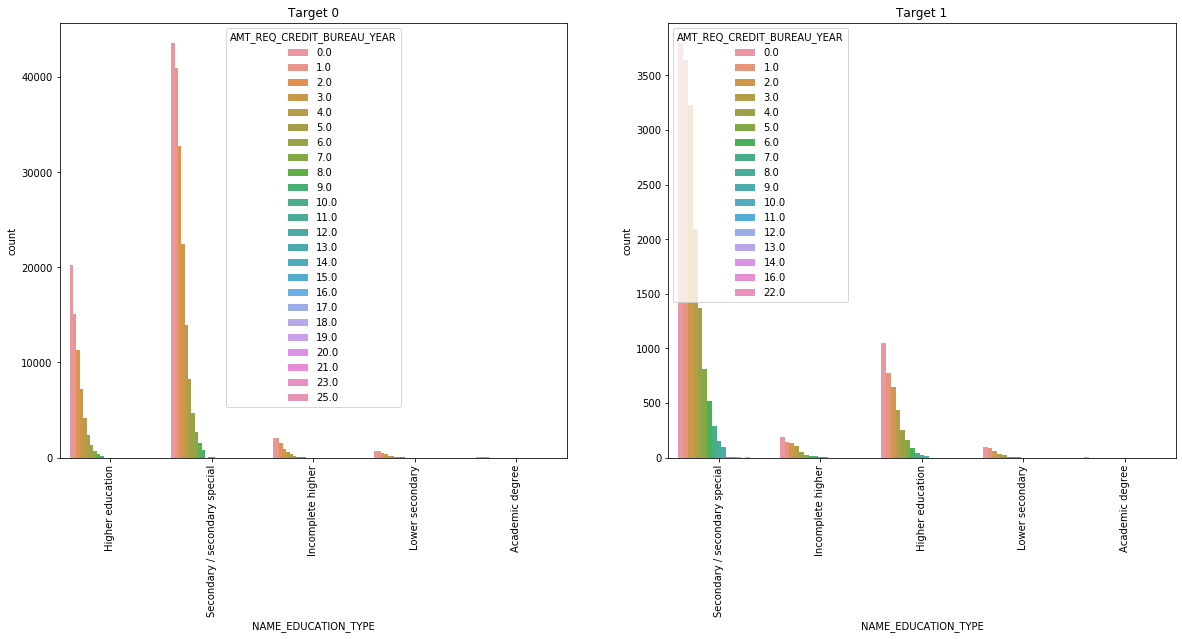

In [64]:
# Univarate Analysis of Education type and Bureau calls.
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
p = sns.countplot(x = "NAME_EDUCATION_TYPE", hue= 'AMT_REQ_CREDIT_BUREAU_YEAR', data = target0_df)
plt.xticks(rotation='vertical')
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(x = "NAME_EDUCATION_TYPE", hue= 'AMT_REQ_CREDIT_BUREAU_YEAR', data = target1_df)
plt.xticks(rotation='vertical')
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

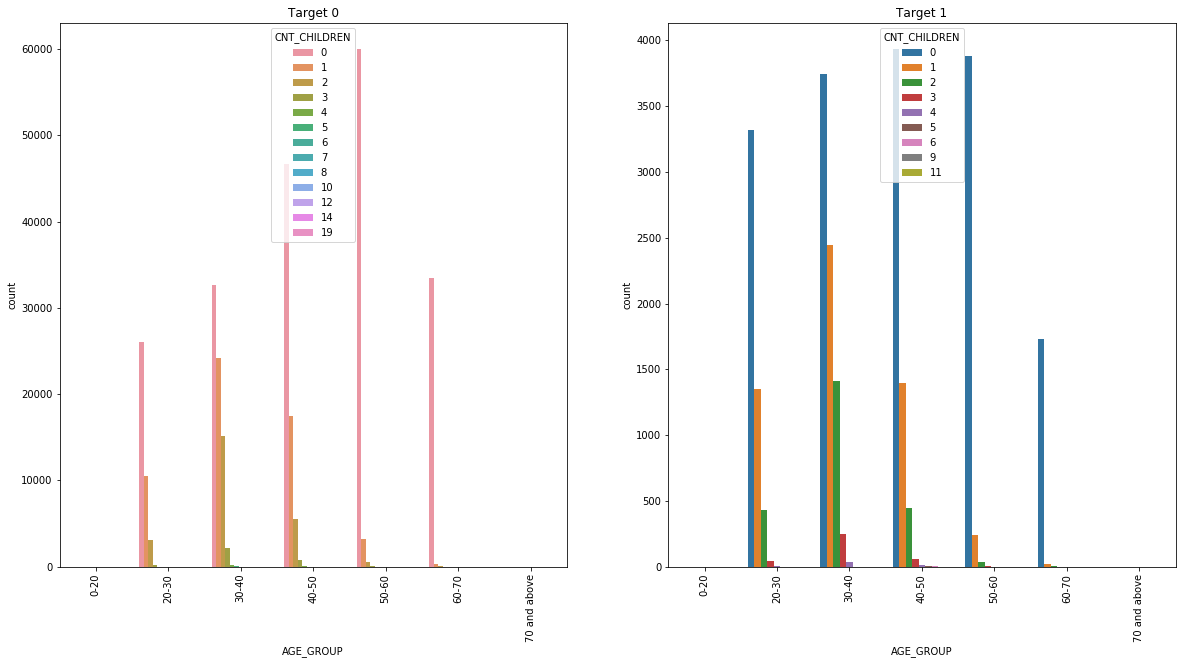

In [65]:
## Univariate analysis on Age group an Number of children
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
p = sns.countplot(x = "AGE_GROUP", hue= 'CNT_CHILDREN', data = target0_df)
plt.xticks(rotation='vertical')
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(x = "AGE_GROUP", hue= 'CNT_CHILDREN', data = target1_df)
plt.xticks(rotation='vertical')
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

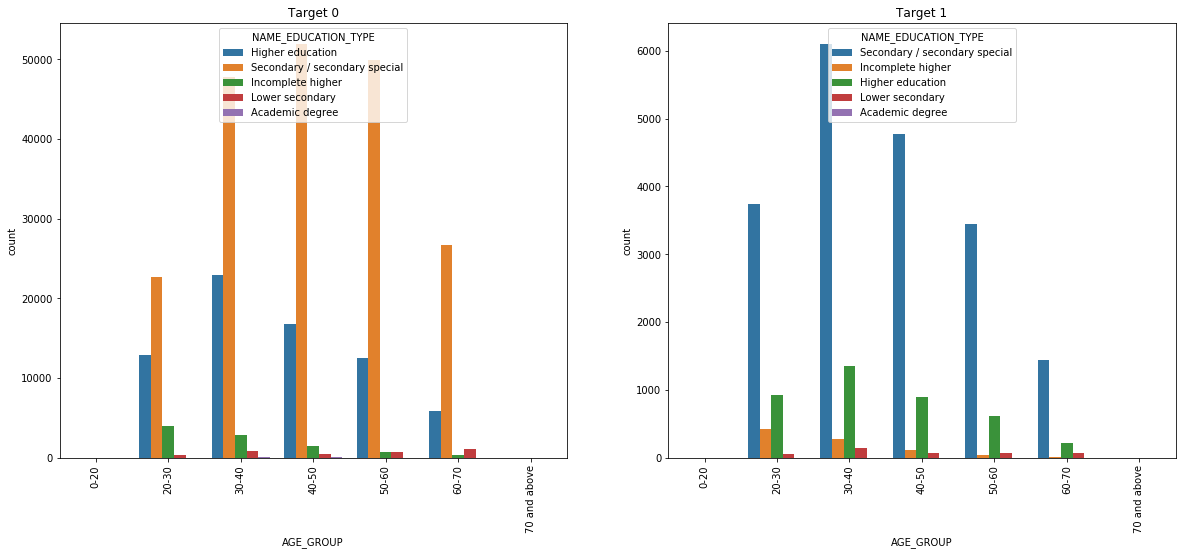

In [66]:
# Univarate Analysis of Age group with Education type.
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
p = sns.countplot(x = "AGE_GROUP", hue= 'NAME_EDUCATION_TYPE', data = target0_df)
plt.xticks(rotation='vertical')
#plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(x = "AGE_GROUP", hue= 'NAME_EDUCATION_TYPE', data = target1_df)
plt.xticks(rotation='vertical')
#plt.ylabel(" Counts")
plt.title("Target 1")


Text(0.5, 1.0, 'Target 1')

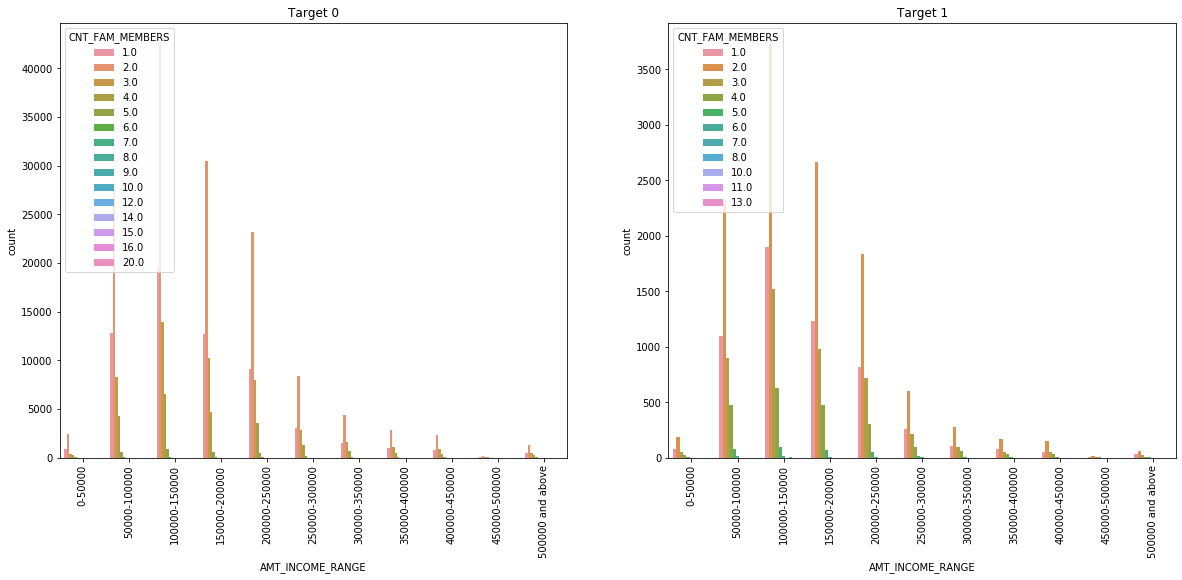

In [67]:
# Univarate Analysis Income range with Family members.
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
p = sns.countplot(x = "AMT_INCOME_RANGE", hue= 'CNT_FAM_MEMBERS', data = target0_df)
plt.xticks(rotation='vertical')
#plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(x = "AMT_INCOME_RANGE", hue= 'CNT_FAM_MEMBERS', data = target1_df)
plt.xticks(rotation='vertical')
#plt.ylabel(" Counts")
plt.title("Target 1")

Concluding the below points about defaulters from the  Univariate Segmented plots.
 
*  Age group 30 - 50 with 2 family members are more defaulters .Majority of them have secondary education only.
*  Most of them in group are having either 0 or 1 kids.
*  This age group is making more enquires with the bank in both the case.
*  Their income range are in between 1 to 2 lakhs.



# Bivariate Analysis

Text(0.5, 1.0, 'Target 1')

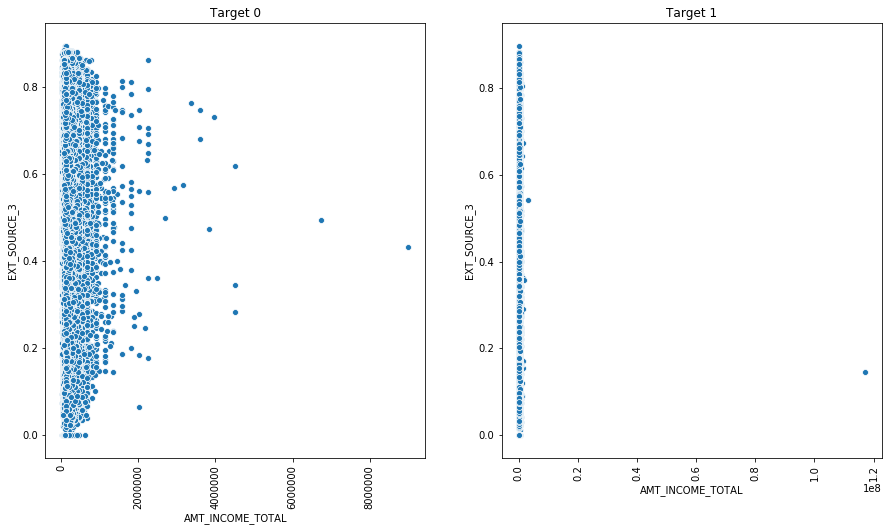

In [68]:
# Bivariate Analysis of EXT souce 2 and income total
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
p = sns.scatterplot(y="EXT_SOURCE_3", x="AMT_INCOME_TOTAL", data=target0_df)
plt.xticks(rotation='vertical')
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.scatterplot(y="EXT_SOURCE_3", x="AMT_INCOME_TOTAL", data=target1_df)
plt.xticks(rotation='vertical')
plt.title("Target 1")   

Text(0.5, 1.0, 'Target 1')

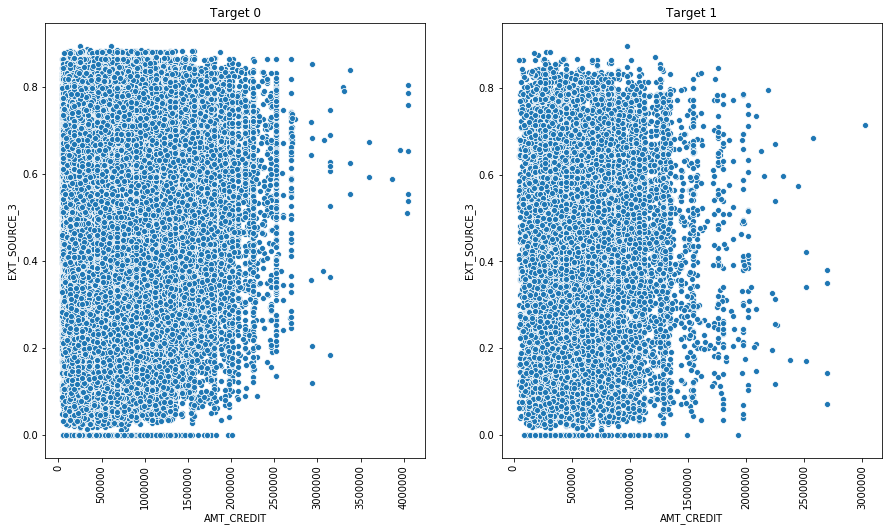

In [69]:
# Bivariate Analysis of EXT source 2 and Amount Credit
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
p = sns.scatterplot(y="EXT_SOURCE_3", x="AMT_CREDIT", data=target0_df)
plt.xticks(rotation='vertical')
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.scatterplot(y="EXT_SOURCE_3", x="AMT_CREDIT", data=target1_df)
plt.xticks(rotation='vertical')
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

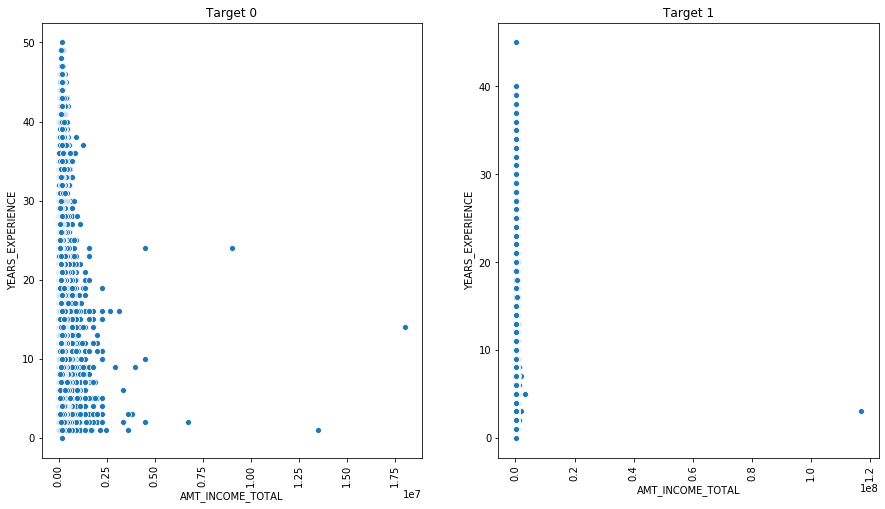

In [70]:
 #Bivariate Analysis of Years Experience and Amount Income total
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
p=sns.scatterplot(y="YEARS_EXPERIENCE", x="AMT_INCOME_TOTAL", data=target0_df)
plt.xticks(rotation='vertical')
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.scatterplot(y="YEARS_EXPERIENCE", x="AMT_INCOME_TOTAL", data=target1_df)
plt.xticks(rotation='vertical')
plt.title("Target 1")


* External source 3 is a good column for analysis .Normalized score scattered very less for defaulters. It is less than 10k income range, where as for non defaulters it is distributed well till 2 lakhs.The score for credit is scattered till 1.5 lakhs where as 2 lakhs for non defaulters. 
* Defaulters are maintining a low income total compare with non defulters.

 

Text(0.5, 1, 'Occupation vs Credit Amount')

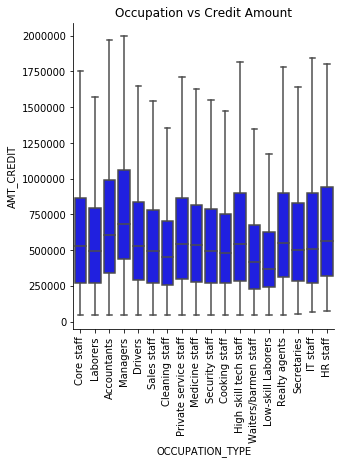

In [71]:
# Bivariate Analysis with box plot for Target 0 ->Occupation type vs Credit
sns.catplot(data =target0_df, x='OCCUPATION_TYPE', y='AMT_CREDIT',kind='box',color='b',showfliers=False)
plt.xticks(rotation='vertical')
plt.title("Occupation vs Credit Amount")

Text(0.5, 1, 'Occupation vs Credit Amout')

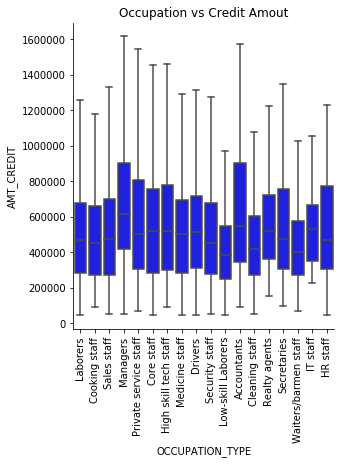

In [74]:
# Bivariate Analysis with box plot for Target 1 ->Occupation type vs Credit
sns.catplot(data =target1_df, x='OCCUPATION_TYPE', y='AMT_CREDIT',kind='box',color='b',showfliers=False)
plt.xticks(rotation='vertical')
plt.title("Occupation vs Credit Amout")

Text(0.5, 1.0, 'Occupation Type vs Income total')

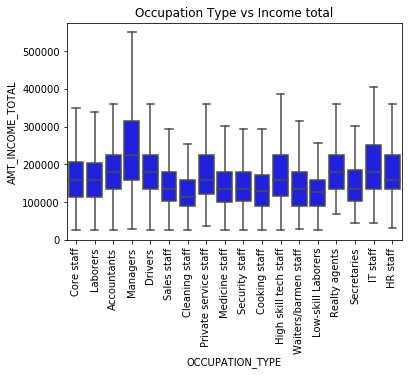

In [72]:
# Bivariate Analysis with box plot for Target 0 ->Occupation type vs Income Total
sns.boxplot(data =target0_df, x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL',color='b',showfliers=False)
plt.xticks(rotation='vertical')
plt.title("Occupation Type vs Income total")

Text(0.5, 1.0, 'Occupation Type vs Income total')

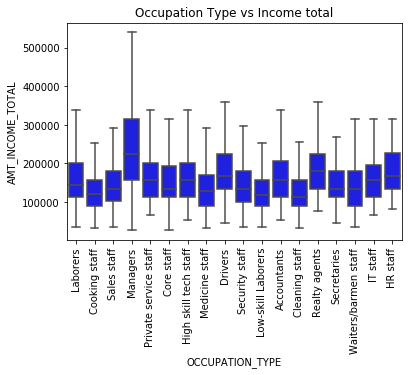

In [73]:
# Bivariate Analysis with box plot for Target 1 ->Occupation type vs Income Total
sns.boxplot(data =target1_df, x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL',color='b',showfliers=False)
plt.xticks(rotation='vertical')
plt.title("Occupation Type vs Income total")

* Amoung defaulters managers and accountants are having more credit amount.Low credit amount are for low skill and waiters.
* Among defaulters, Managers has more income total and cleaning/cooking/low skill laborers have low income range.

### Segmented Bivariate Analysis w.r.t Target 1

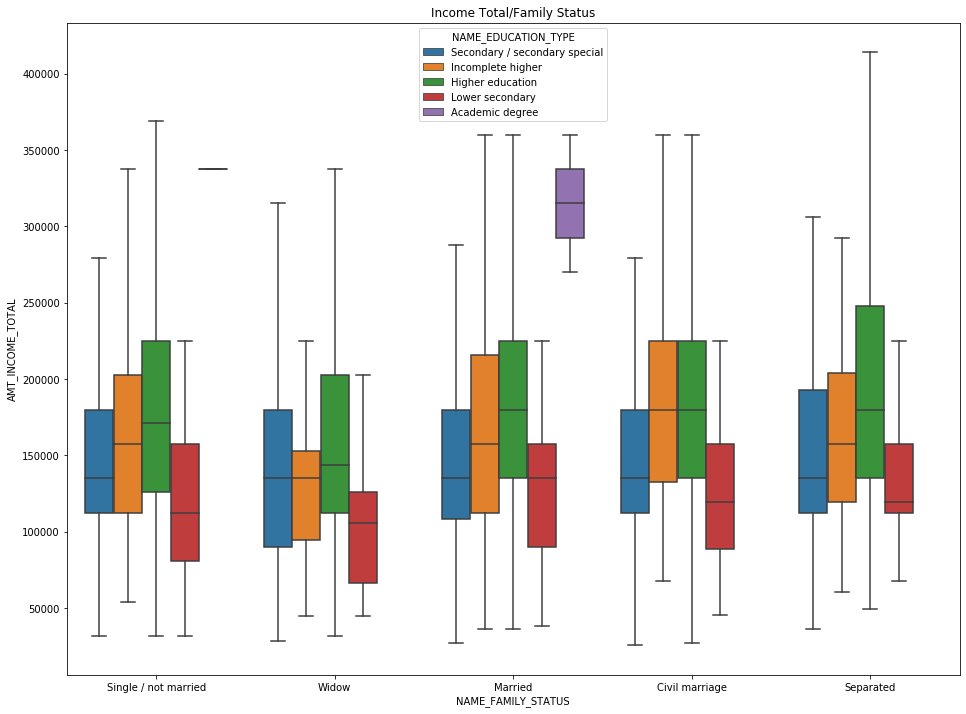

In [75]:
# Plotting with Family status/Income Total and education type
plt.figure(figsize=(16,12))
sns.boxplot(data =target1_df, x='NAME_FAMILY_STATUS', y='AMT_INCOME_TOTAL', hue ='NAME_EDUCATION_TYPE',showfliers=False)
plt.title('Income Total/Family Status')
plt.show()

* Among defaulters,Academic degress holders has highest income total and lowest income total is for lower secondary education. These two categories are belongs to widow.

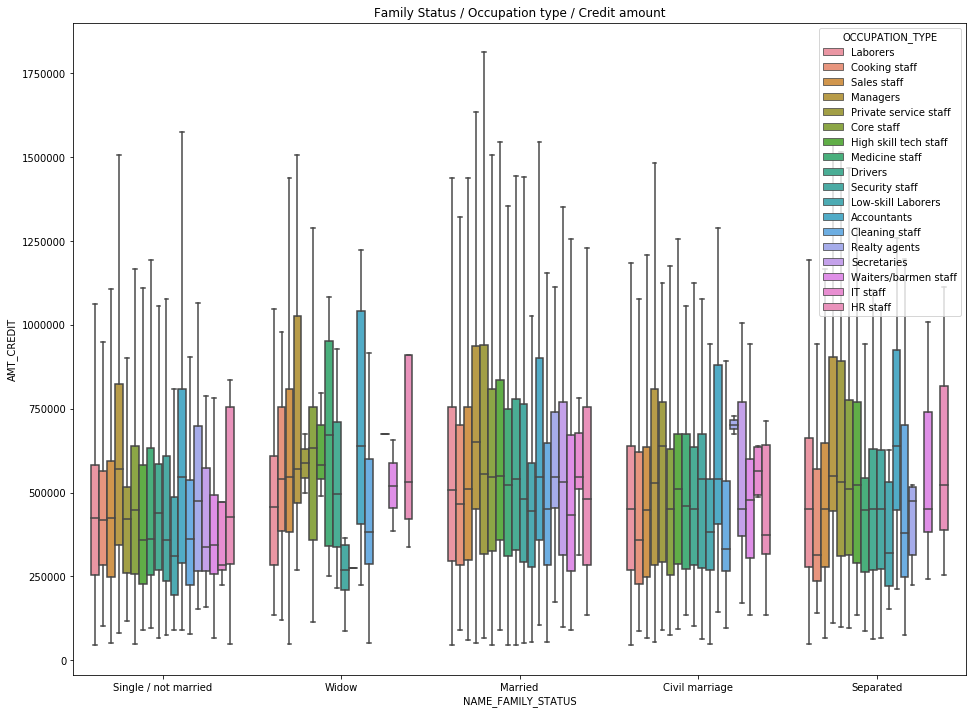

In [76]:
# Plotting with Family Status/Occupation type and Credit amount
plt.figure(figsize=(16,12))
sns.boxplot(data =target1_df, x='NAME_FAMILY_STATUS', y='AMT_CREDIT', hue ='OCCUPATION_TYPE',showfliers=False)
plt.title('Family Status / Occupation type / Credit amount')
plt.show()


* For defaulters hightest and lowest credit amounts are holding  by widows. The highest credit amount people are working as accountants or managers.The lowest credit amount people are working as low skilled laborers.

# Correlation 

In [33]:
## Converting Age group from Category to Numeric as we need this column for correlation analysis.

target0_df.AGE_GROUP.replace({"0-20":1,"20-30":2,"30-40" :3,"40-50":4,"50-60":5,"60-70":6,"70 and above": 7},
                              inplace=True)
target0_df.loc[:,'AGE_GROUP'] = pd.to_numeric(target0_df['AGE_GROUP'], errors = 'coerce')
target1_df.AGE_GROUP.replace({"0-20":1,"20-30":2,"30-40" :3,"40-50":4,"50-60":5,"60-70":6,"70 and above": 7},
                              inplace=True)
target1_df.loc[:,'AGE_GROUP'] = pd.to_numeric(target1_df['AGE_GROUP'], errors = 'coerce')

In [34]:
## Converting AMT_INCOME_RANGE from Category to Numeric as we need this column for correlation analysis.

target0_df.AMT_INCOME_RANGE.replace({"50000-100000":1,"100000-150000":2,"150000-200000": 3,"200000-250000": 4,
                                     "200000-250000": 5,"250000-300000": 6,"300000-350000": 7,"350000-400000": 8,
                                      "400000-450000": 9,"450000-500000": 10,"500000 and above": 11},
                                      inplace=True)
target0_df.loc[:,'AMT_INCOME_RANGE'] = pd.to_numeric(target0_df['AMT_INCOME_RANGE'], errors = 'coerce')
target1_df.AMT_INCOME_RANGE.replace({"50000-100000":1,"100000-150000":2,"150000-200000": 3,"200000-250000": 4,
                                     "200000-250000": 5,"250000-300000": 6,"300000-350000": 7,"350000-400000": 8,
                                      "400000-450000": 9,"450000-500000": 10,"500000 and above": 11},
                                      inplace=True)
target1_df.loc[:,'AMT_INCOME_RANGE'] = pd.to_numeric(target1_df['AMT_INCOME_RANGE'], errors = 'coerce')

In [35]:
# Correlation matrix columns -> Removed ID, Target, AMOUNT_INCOME_TOTAL( Kept Income range instead) ,
# Bureau fields others than Year

target0_corr=target0_df[['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_GROUP', 'YEARS_EXPERIENCE',
       'AMT_INCOME_RANGE']]
target1_corr=target1_df[['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_2', 'EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_GROUP', 'YEARS_EXPERIENCE',
       'AMT_INCOME_RANGE']] 

target0=target0_corr.corr()
target1=target1_corr.corr()

In [36]:
# Seeing Target0
target0

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,YEARS_EXPERIENCE,AMT_INCOME_RANGE
CODE_GENDER,1.000000,-0.351610,0.045494,-0.053103,-0.026053,-0.077527,-0.027763,-0.088899,0.004100,0.017780,0.020023,0.143908,0.089900,-0.195476
FLAG_OWN_CAR,-0.351610,1.000000,-0.005198,0.105650,0.117166,0.141781,0.121121,0.153772,0.051735,-0.019984,-0.038210,-0.133414,-0.027167,0.213751
FLAG_OWN_REALTY,0.045494,-0.005198,1.000000,-0.004041,-0.041648,-0.006001,-0.047686,0.005589,0.001795,0.041591,0.067821,0.116055,0.031899,0.004786
CNT_CHILDREN,-0.053103,0.105650,-0.004041,1.000000,0.003081,0.020909,-0.000526,0.878570,-0.015455,-0.041729,-0.042547,-0.328113,-0.062896,0.027810
AMT_CREDIT,-0.026053,0.117166,-0.041648,0.003081,1.000000,0.771297,0.986880,0.064535,0.129140,0.036085,-0.048866,0.047531,0.087369,0.397836
AMT_ANNUITY,-0.077527,0.141781,-0.006001,0.020909,0.771297,1.000000,0.776251,0.075786,0.126611,0.028055,-0.010886,-0.012021,0.052056,0.470676
AMT_GOODS_PRICE,-0.027763,0.121121,-0.047686,-0.000526,0.986880,0.776251,1.000000,0.062779,0.135635,0.038897,-0.051243,0.044906,0.088477,0.403645
CNT_FAM_MEMBERS,-0.088899,0.153772,0.005589,0.878570,0.064535,0.075786,0.062779,1.000000,-0.000585,-0.026825,-0.030269,-0.278915,-0.031450,0.038394
EXT_SOURCE_2,0.004100,0.051735,0.001795,-0.015455,0.129140,0.126611,0.135635,-0.000585,1.000000,0.084597,-0.021168,0.075016,0.081763,0.162944
EXT_SOURCE_3,0.017780,-0.019984,0.041591,-0.041729,0.036085,0.028055,0.038897,-0.026825,0.084597,1.000000,-0.070355,0.191369,0.121450,-0.078838


In [37]:
# Seeing Target1
target1

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,YEARS_EXPERIENCE,AMT_INCOME_RANGE
CODE_GENDER,1.000000,-0.304224,0.029268,0.022565,0.011190,-0.083132,0.014140,0.010302,0.023106,-0.023781,0.011732,0.085839,0.086840,-0.170644
FLAG_OWN_CAR,-0.304224,1.000000,0.023182,0.067519,0.095546,0.136593,0.098545,0.110044,0.043901,-0.013224,-0.009258,-0.068622,-0.002648,0.187426
FLAG_OWN_REALTY,0.029268,0.023182,1.000000,0.016963,-0.011225,0.003956,-0.021082,0.026917,-0.000187,0.020615,0.064958,0.106903,0.013497,0.031644
CNT_CHILDREN,0.022565,0.067519,0.016963,1.000000,-0.001675,0.031257,-0.008107,0.885484,-0.012260,-0.020268,-0.035427,-0.251976,-0.032779,-0.002862
AMT_CREDIT,0.011190,0.095546,-0.011225,-0.001675,1.000000,0.752195,0.982566,0.051224,0.120848,0.077698,-0.035719,0.130506,0.106354,0.335599
AMT_ANNUITY,-0.083132,0.136593,0.003956,0.031257,0.752195,1.000000,0.752022,0.075711,0.116305,0.041415,-0.013841,0.011578,0.048645,0.407609
AMT_GOODS_PRICE,0.014140,0.098545,-0.021082,-0.008107,0.982566,0.752022,1.000000,0.047381,0.131198,0.078719,-0.037865,0.130930,0.112014,0.337384
CNT_FAM_MEMBERS,0.010302,0.110044,0.026917,0.885484,0.051224,0.075711,0.047381,1.000000,0.001883,-0.019884,-0.012684,-0.198351,0.001506,0.005419
EXT_SOURCE_2,0.023106,0.043901,-0.000187,-0.012260,0.120848,0.116305,0.131198,0.001883,1.000000,0.077760,0.000823,0.105390,0.094029,0.137515
EXT_SOURCE_3,-0.023781,-0.013224,0.020615,-0.020268,0.077698,0.041415,0.078719,-0.019884,0.077760,1.000000,-0.052539,0.166330,0.085163,-0.060455


In [41]:
# Finding Top 10 correlation matrix for Target = 0
corrdf = target0.where(np.triu(np.ones(target0.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Variable_1', 'Variable_2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).reset_index(drop=True).head(10)

,Variable_1,Variable_2,Correlation
0,AMT_GOODS_PRICE,AMT_CREDIT,0.99
1,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
2,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
3,AMT_ANNUITY,AMT_CREDIT,0.77
4,AMT_INCOME_RANGE,AMT_ANNUITY,0.47
5,AMT_INCOME_RANGE,AMT_GOODS_PRICE,0.40
6,AMT_INCOME_RANGE,AMT_CREDIT,0.40
7,FLAG_OWN_CAR,CODE_GENDER,0.35
8,YEARS_EXPERIENCE,AGE_GROUP,0.34
9,AGE_GROUP,CNT_CHILDREN,0.33


In [42]:
# Top 10 correlation matrix for Target = 1

corrdf = target1.where(np.triu(np.ones(target1.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Variable_1', 'Variable_2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).reset_index(drop=True).head(10)

,Variable_1,Variable_2,Correlation
0,AMT_GOODS_PRICE,AMT_CREDIT,0.98
1,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
2,AMT_ANNUITY,AMT_CREDIT,0.75
3,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
4,AMT_INCOME_RANGE,AMT_ANNUITY,0.41
5,AMT_INCOME_RANGE,AMT_GOODS_PRICE,0.34
6,AMT_INCOME_RANGE,AMT_CREDIT,0.34
7,YEARS_EXPERIENCE,AGE_GROUP,0.30
8,FLAG_OWN_CAR,CODE_GENDER,0.30
9,AGE_GROUP,CNT_CHILDREN,0.25


In [43]:
# Vizualisation of correlation using Heat map.

def corr_matrix(data,title):
    plt.figure(figsize=(10, 12))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 50
 # masking the upper side   
    mask = np.zeros_like(data, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Want diagonal elements as well
    mask[np.diag_indices_from(mask)] = False

# heatmap with a color map of choice
    ax=sns.heatmap(data, cmap="YlGnBu",mask=mask,annot=True,linewidth=.3)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()


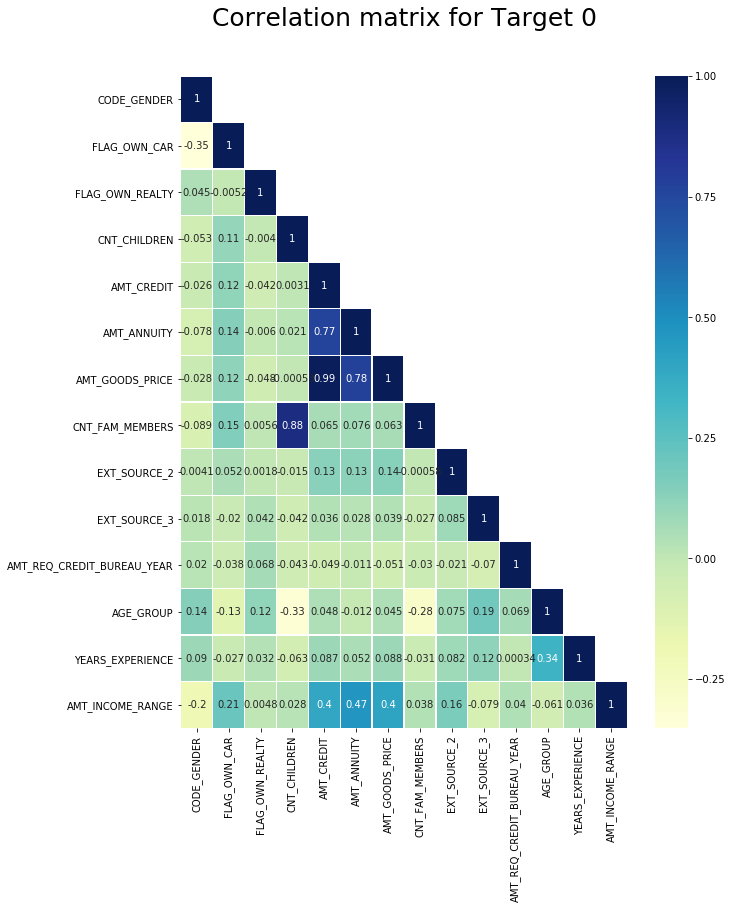

In [44]:
# For Target 0
corr_matrix(data=target0,title='Correlation matrix for Target 0')

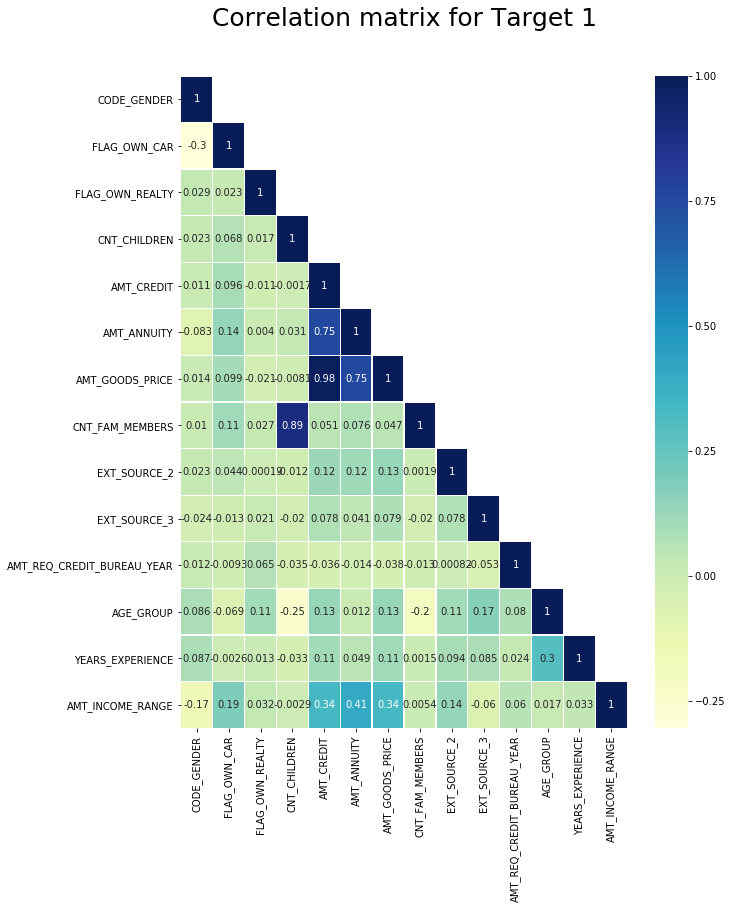

In [45]:
# For Target 1
corr_matrix(data=target1,title='Correlation matrix for Target 1')

* Top 10 correlation of Target 0 and Traget 1 are almost same. Rank 3/ 4 and 8 / 9 are interchanged.

In [92]:
# Reading the application CSV dataset
df2=pd.read_csv(r"previous_application.csv")
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# Checking the information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [95]:
# Checking the statistics
df2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [299]:
## Chekcing for missing values
df2.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [96]:
# Removing null columns greater than 40 percent
null_column_prev =round((df2.isnull().sum()/len(df2))*100,4) 
null_column_40_prev = null_column_prev[null_column_prev.values > 40.0000]
null_column_40_prev = list(null_column_40_prev.index)
df2.drop(labels=null_column_40_prev,axis=1,inplace=True)

In [97]:
## Removing some more columns which are not important
list2  = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
          'DAYS_DECISION','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','SELLERPLACE_AREA','CNT_PAYMENT','NAME_YIELD_GROUP',
          'PRODUCT_COMBINATION']
df2.drop(labels=list2,axis=1,inplace=True)

In [98]:
## Merging application CSV and previous application using SKI_ID_CURR
merge_out = pd.merge(df1, df2, how='inner', on=('SK_ID_CURR'))

In [99]:
# Seeing the merge dataset
merge_out.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,YEARS_EXPERIENCE,AMT_INCOME_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY
0,100002,1,Cash loans,0,0,1,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Business Entity Type 3,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,20-30,2.0,200000-250000,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,XAP,Vehicles,POS,XNA,Stone,Auto technology
1,100003,0,Cash loans,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0,40-50,4.0,250000-300000,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,XAP,XNA,Cash,x-sell,Credit and cash offices,XNA
2,100003,0,Cash loans,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0,40-50,4.0,250000-300000,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,XAP,Furniture,POS,XNA,Stone,Furniture
3,100003,0,Cash loans,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0,40-50,4.0,250000-300000,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,XAP,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics
4,100004,0,Revolving loans,0,1,1,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,50-60,1.0,50000-100000,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,XAP,Mobile,POS,XNA,Regional / Local,Connectivity


* For same ID it self NAME_CONTRACT_STATUS is different status, so it is good to keep all the entries
* There are duplicate column names which are suffixed with _x and _y

In [100]:
## Replacing XNA and XAP with Nan for few of the columns as they are required for the analysis.
merge_out.loc[merge_out['NAME_CASH_LOAN_PURPOSE']=='XNA','NAME_CASH_LOAN_PURPOSE'] = np.NaN
merge_out.loc[merge_out['NAME_CASH_LOAN_PURPOSE']=='XAP','NAME_CASH_LOAN_PURPOSE'] = np.NaN 
merge_out.loc[merge_out['NAME_PORTFOLIO']=='XNA','NAME_PORTFOLIO'] = np.NaN 
merge_out.loc[merge_out['NAME_GOODS_CATEGORY']=='XNA','NAME_GOODS_CATEGORY'] = np.NaN 

In [101]:
merge_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 43 columns):
SK_ID_CURR                    1413701 non-null int64
TARGET                        1413701 non-null int64
NAME_CONTRACT_TYPE_x          1413701 non-null object
CODE_GENDER                   1413701 non-null int32
FLAG_OWN_CAR                  1413701 non-null int64
FLAG_OWN_REALTY               1413701 non-null int64
CNT_CHILDREN                  1413701 non-null int64
AMT_INCOME_TOTAL              1413701 non-null float64
AMT_CREDIT_x                  1413701 non-null float64
AMT_ANNUITY_x                 1413701 non-null float64
AMT_GOODS_PRICE_x             1413701 non-null float64
NAME_INCOME_TYPE              1413701 non-null object
NAME_EDUCATION_TYPE           1413701 non-null object
NAME_FAMILY_STATUS            1413701 non-null object
NAME_HOUSING_TYPE             1413701 non-null object
OCCUPATION_TYPE               956121 non-null object
CNT_FAM_MEMBERS           

# Univarate Analysis on Merged Dataset

In [102]:
## Splitting merge-out dataset based on Target fields.
mer_tar0 = merge_out[merge_out['TARGET'] == 0]
mer_tar1 = merge_out[merge_out['TARGET'] == 1]

Text(0.5, 1.0, 'Target 1')

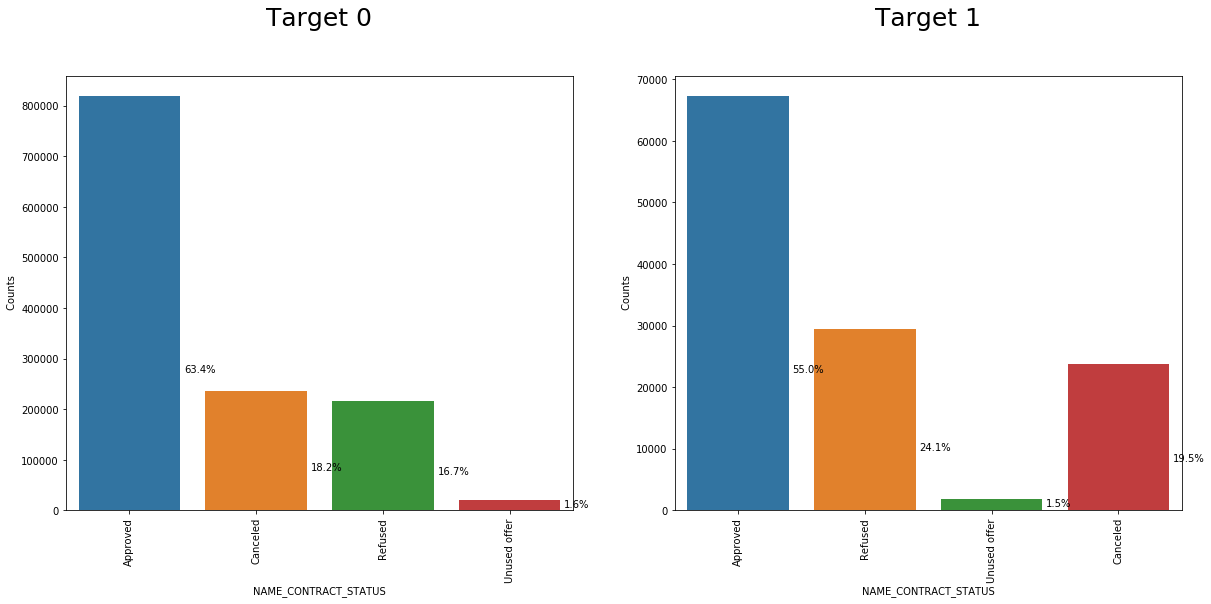

In [103]:
## column Name contract Status
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
ax = sns.countplot(data=mer_tar0, x= 'NAME_CONTRACT_STATUS')
plt.xticks(rotation='vertical')
total = len(mer_tar0)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.03
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y))
plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
ax = sns.countplot(data=mer_tar1, x= 'NAME_CONTRACT_STATUS')
plt.xticks(rotation='vertical')
total = len(mer_tar1)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.03
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y))
plt.ylabel(" Counts")
plt.title("Target 1")


Text(0.5, 1.0, 'Target 1')

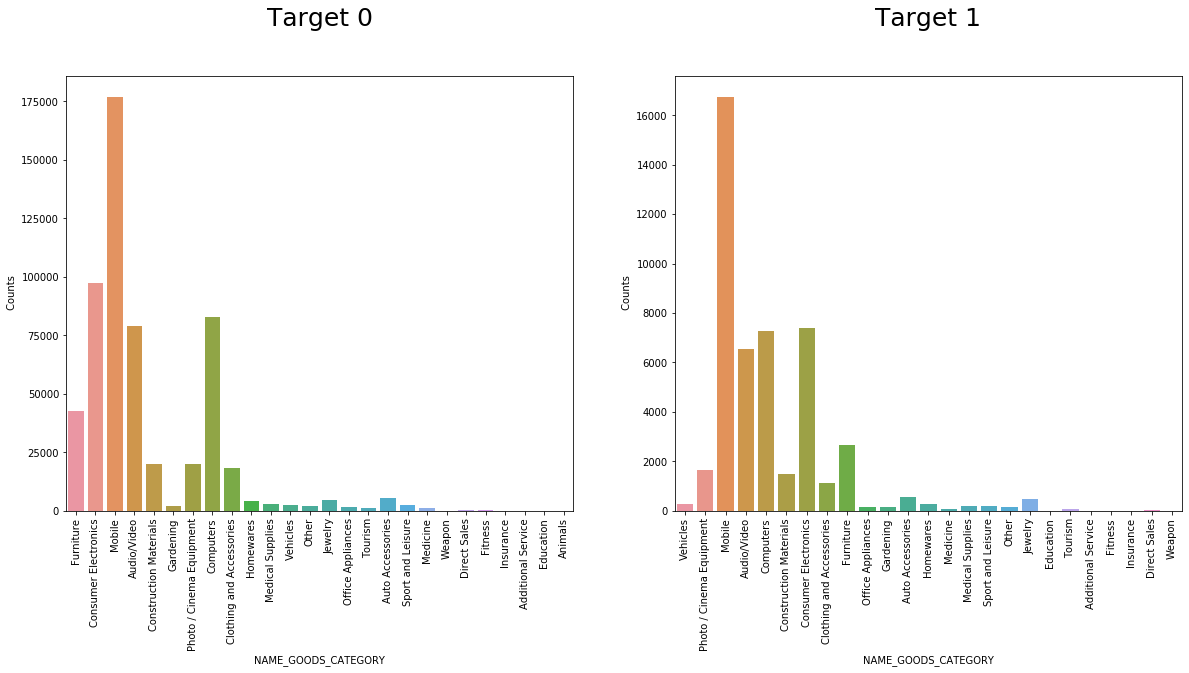

In [104]:
# Column Goods category
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
p = sns.countplot(data=mer_tar0, x= 'NAME_GOODS_CATEGORY')
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(data=mer_tar1, x= 'NAME_GOODS_CATEGORY')
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

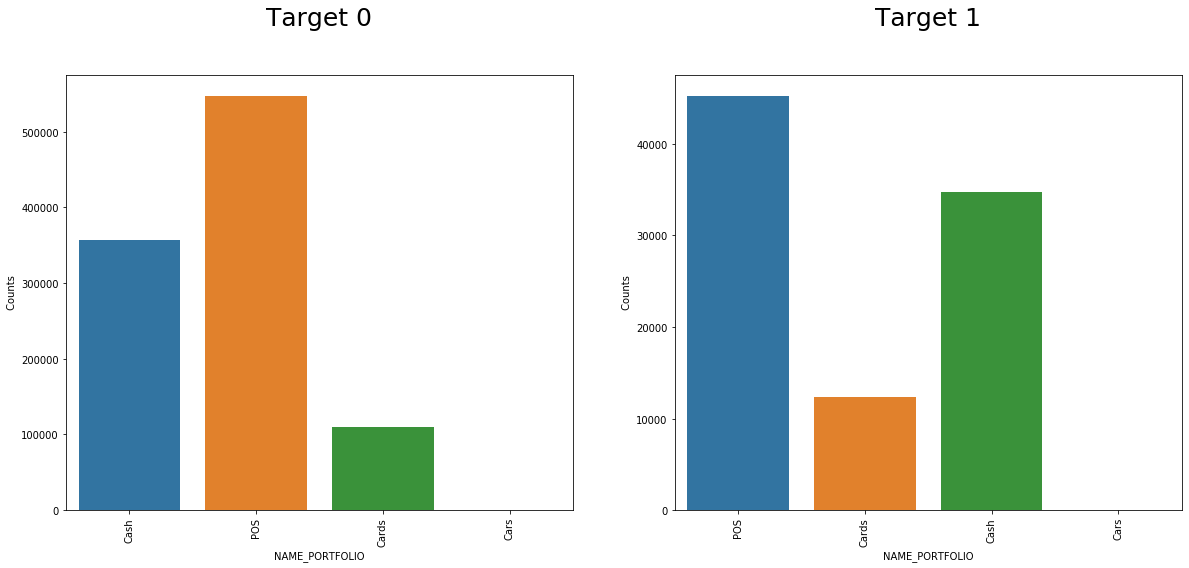

In [105]:
# Column Name Portfolio
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
p = sns.countplot(data=mer_tar0, x= 'NAME_PORTFOLIO')
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(data=mer_tar1, x= 'NAME_PORTFOLIO')
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

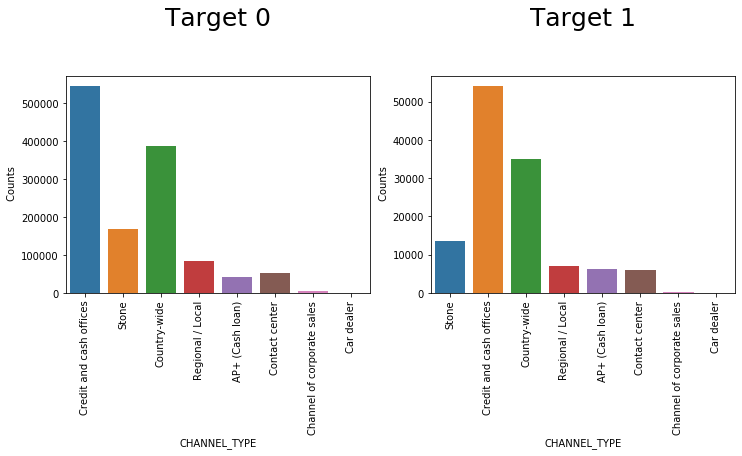

In [107]:
# Column Channe1 type
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
p = sns.countplot(data=mer_tar0, x= 'CHANNEL_TYPE')
ax.set(ylabel="Percent")
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(data=mer_tar1, x= 'CHANNEL_TYPE')
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

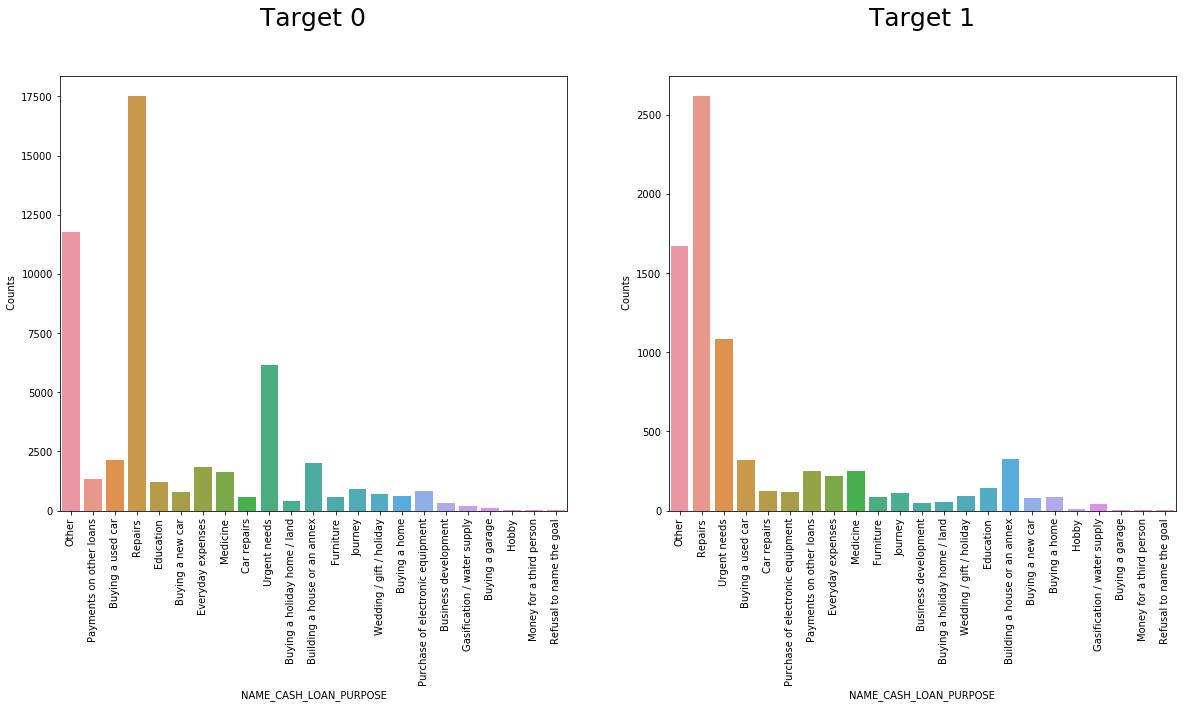

In [108]:
# Column Cash loan purpose
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
p = sns.countplot(data=mer_tar0, x= 'NAME_CASH_LOAN_PURPOSE')
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(data=mer_tar1, x= 'NAME_CASH_LOAN_PURPOSE')
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

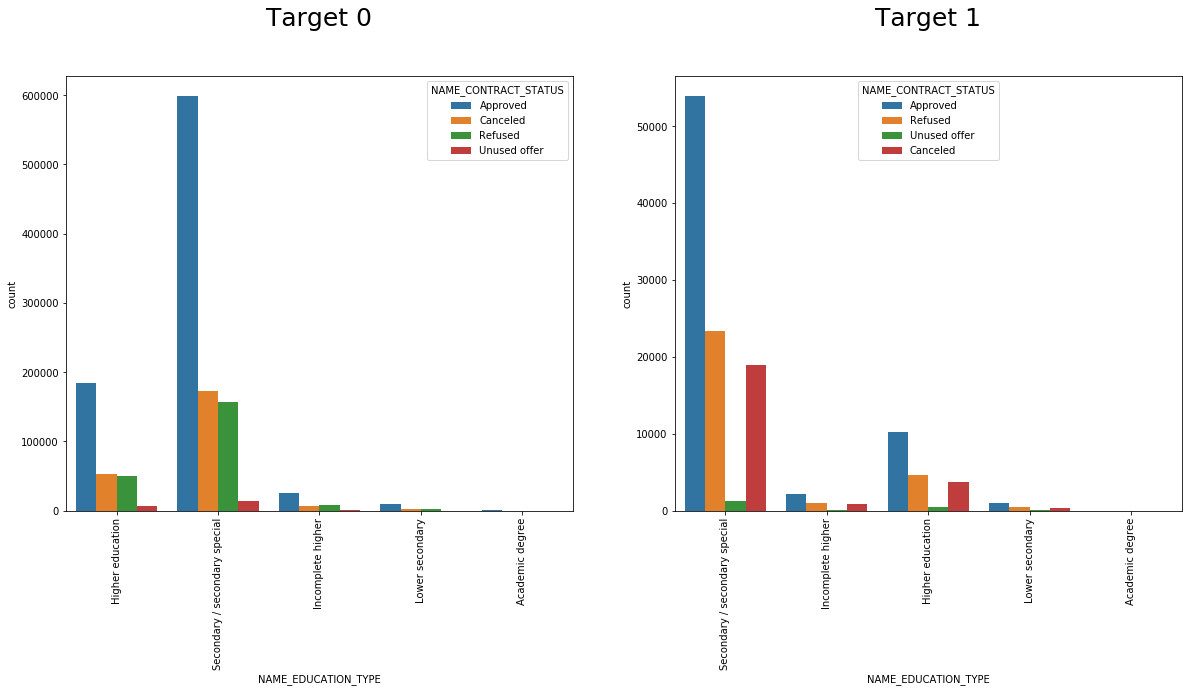

In [109]:
# Univarate Analysis of education type with contract status
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
p = sns.countplot(x = "NAME_EDUCATION_TYPE", hue= 'NAME_CONTRACT_STATUS', data = mer_tar0)
plt.xticks(rotation='vertical')
#plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(x = "NAME_EDUCATION_TYPE", hue= 'NAME_CONTRACT_STATUS', data = mer_tar1)
plt.xticks(rotation='vertical')
#plt.ylabel(" Counts")
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

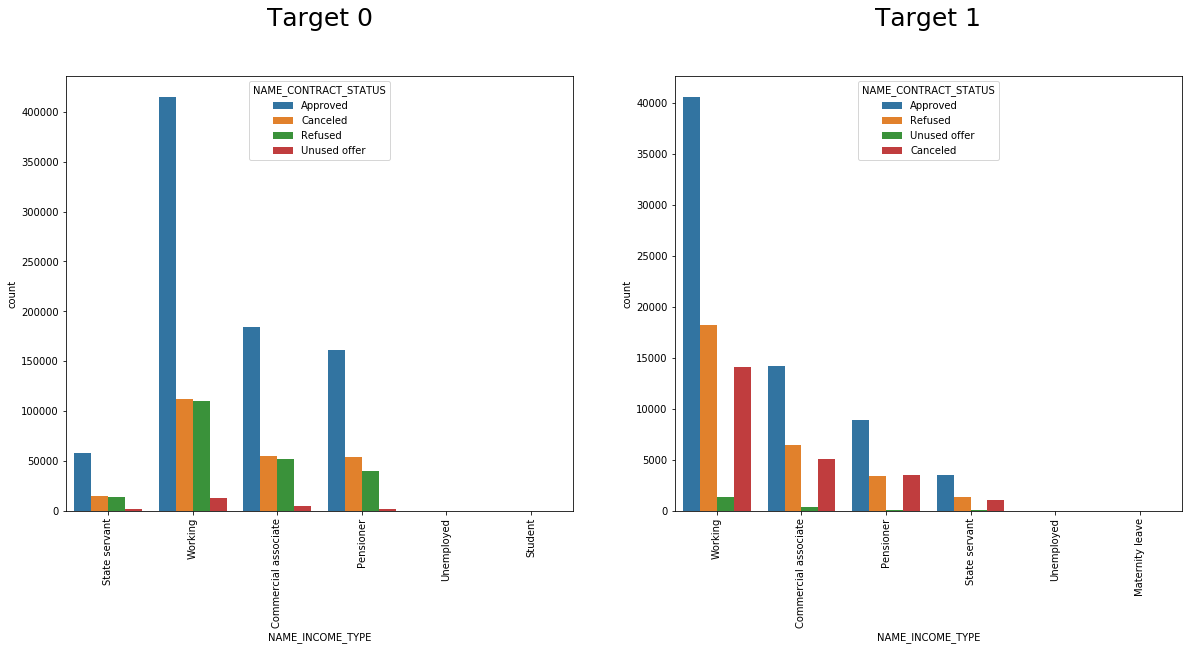

In [110]:
# Univarate Analysis of education type with contract status
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
p = sns.countplot(x = "NAME_INCOME_TYPE", hue= 'NAME_CONTRACT_STATUS', data = mer_tar0)
plt.xticks(rotation='vertical')
#plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(x = "NAME_INCOME_TYPE", hue= 'NAME_CONTRACT_STATUS', data = mer_tar1)
plt.xticks(rotation='vertical')
#plt.ylabel(" Counts")
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

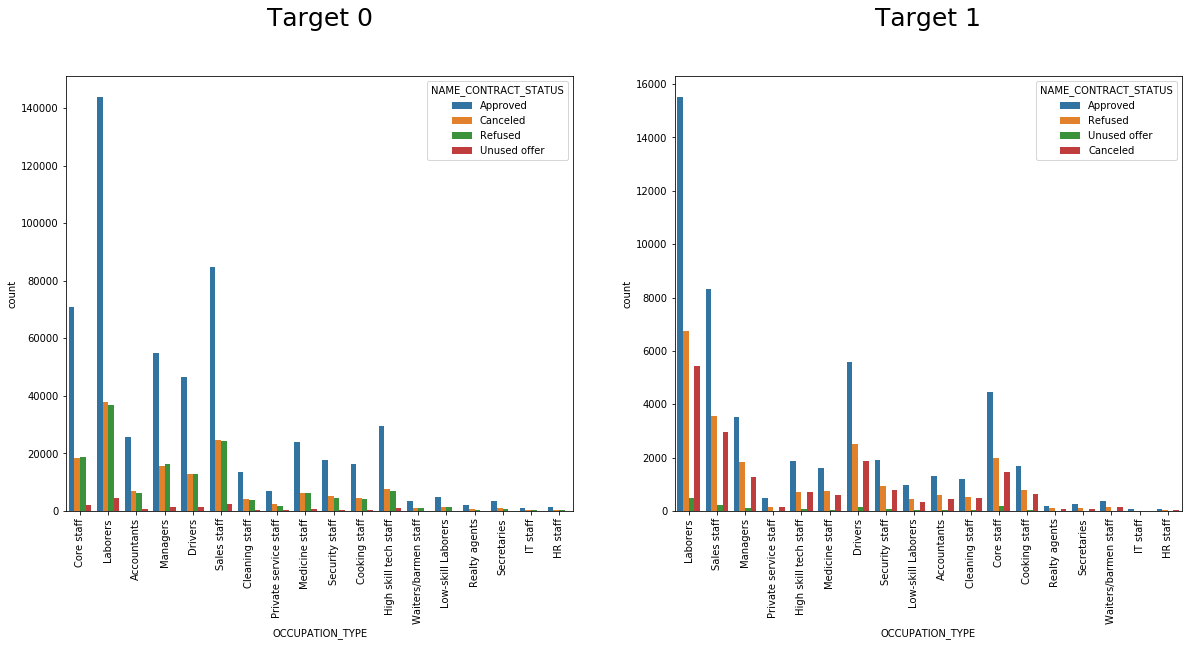

In [112]:
# Univarate Analysis of education type with contract status
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
p = sns.countplot(x = "OCCUPATION_TYPE", hue= 'NAME_CONTRACT_STATUS', data = mer_tar0)
plt.xticks(rotation='vertical')
#plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(x = "OCCUPATION_TYPE", hue= 'NAME_CONTRACT_STATUS', data = mer_tar1)
plt.xticks(rotation='vertical')
#plt.ylabel(" Counts")
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

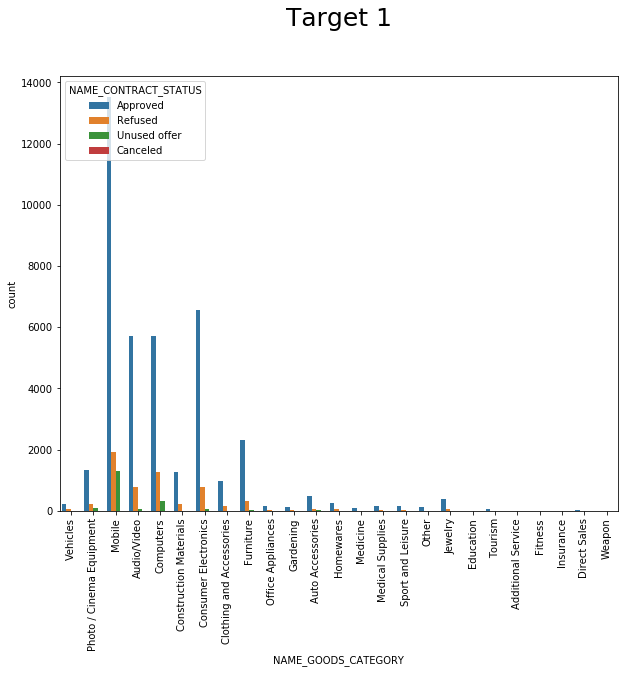

In [113]:
# Univarate Analysis of Goods category with Contarct status for -> Target  1
plt.figure(figsize=(10,8))
sns.countplot(data =mer_tar1,hue='NAME_CONTRACT_STATUS',x='NAME_GOODS_CATEGORY')
plt.xticks(rotation='vertical')
#plt.ylabel(" Counts")
plt.title("Target 1")


Text(0.5, 1.0, 'Target 1')

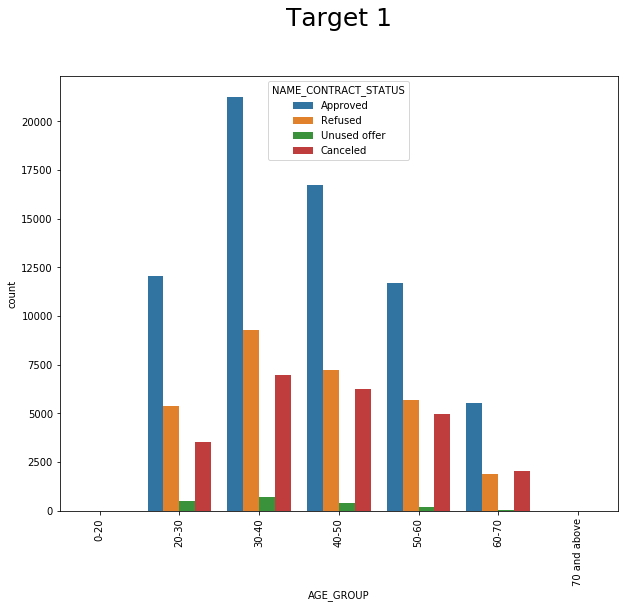

In [114]:
# Univarate Analysis of AGE group with Contract Status for Target 1
plt.figure(figsize=(10,8))
sns.countplot(data =mer_tar1,hue='NAME_CONTRACT_STATUS',x='AGE_GROUP')
plt.xticks(rotation='vertical')
#plt.ylabel(" Counts")
plt.title("Target 1")

Conculution from above Univariate plots about defaulters.

* Loan demand mostly for the purchase of mobile.
* Portfolio type mostly by POS
* Channel type is credit and cash offices.
* Majority of purpose of loan is for repairs.
* More cancelled loans are from secondary/secondary special educated people.
* More loan cancallation is from Laborers and sales staff occupation.
* Previously approved but now in defaulters are mostly Drivers,Laborers,Sales and Cores staffs and education is of higher education


# Bivariate Analysis

##### Analysis on Merget Target 1 file with Previous and Current columns  w.r.t Contract Status

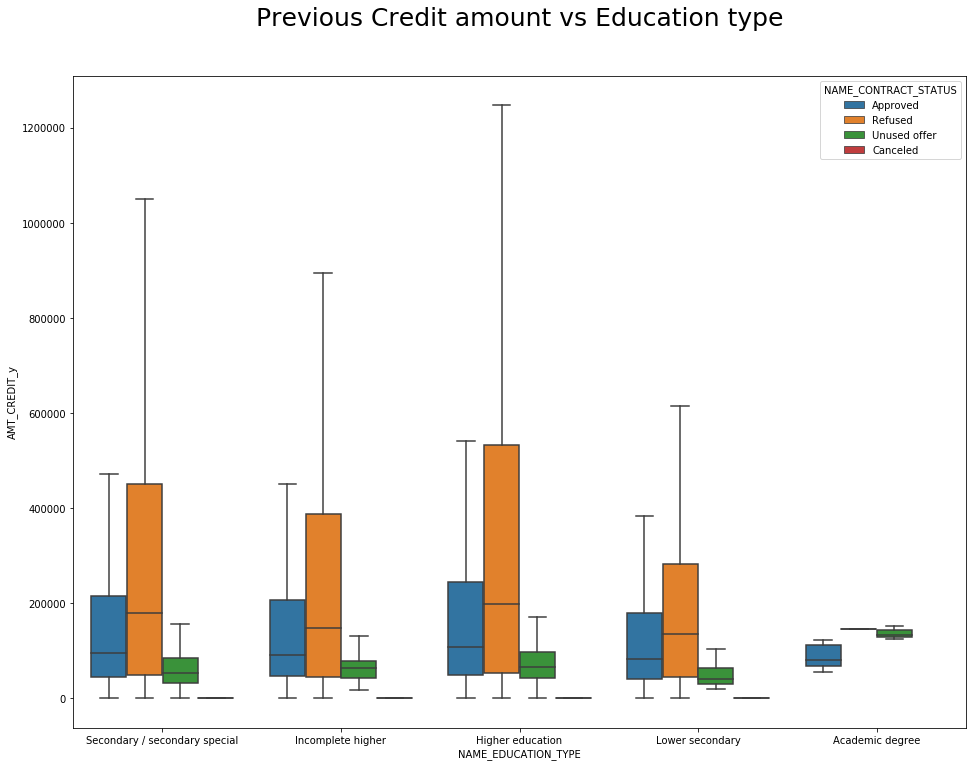

In [116]:
# Plotting Education type with Previous credit amount For Target 1
plt.figure(figsize=(16,12))
sns.boxplot(data =mer_tar1, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT_y', hue ='NAME_CONTRACT_STATUS',showfliers=False)
plt.title('Previous Credit amount vs Education type')
plt.show()

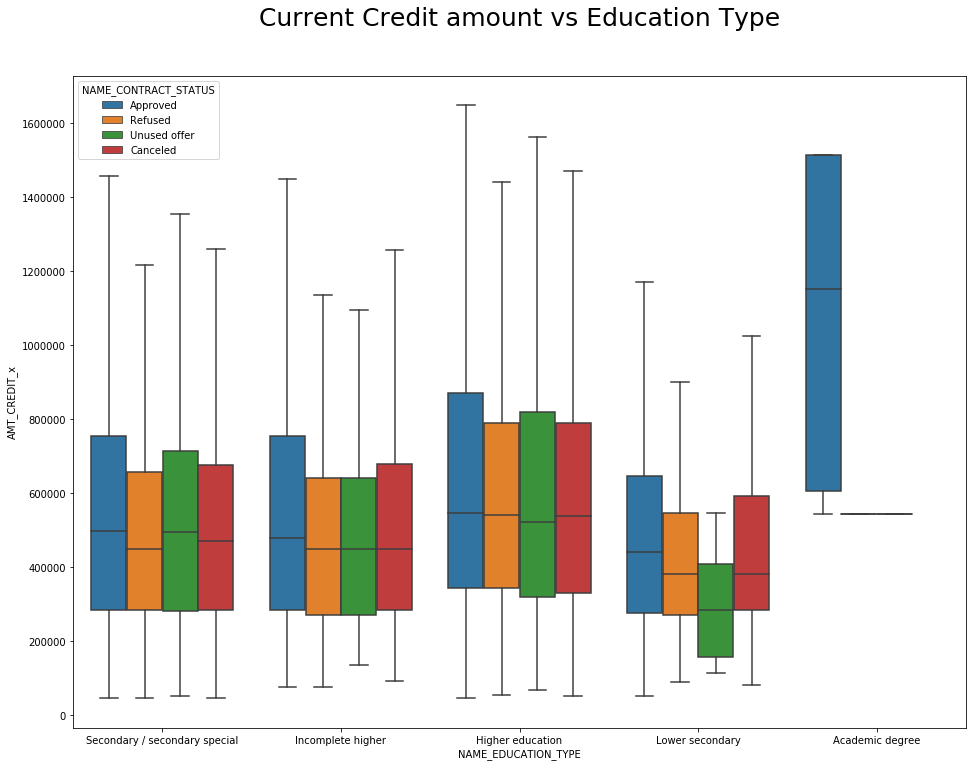

In [117]:
# Plotting Education type with Current credit amount for Target 1
plt.figure(figsize=(16,12))
sns.boxplot(data =mer_tar1, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT_x', hue ='NAME_CONTRACT_STATUS',showfliers=False)
plt.title('Current Credit amount vs Education Type')
plt.show()

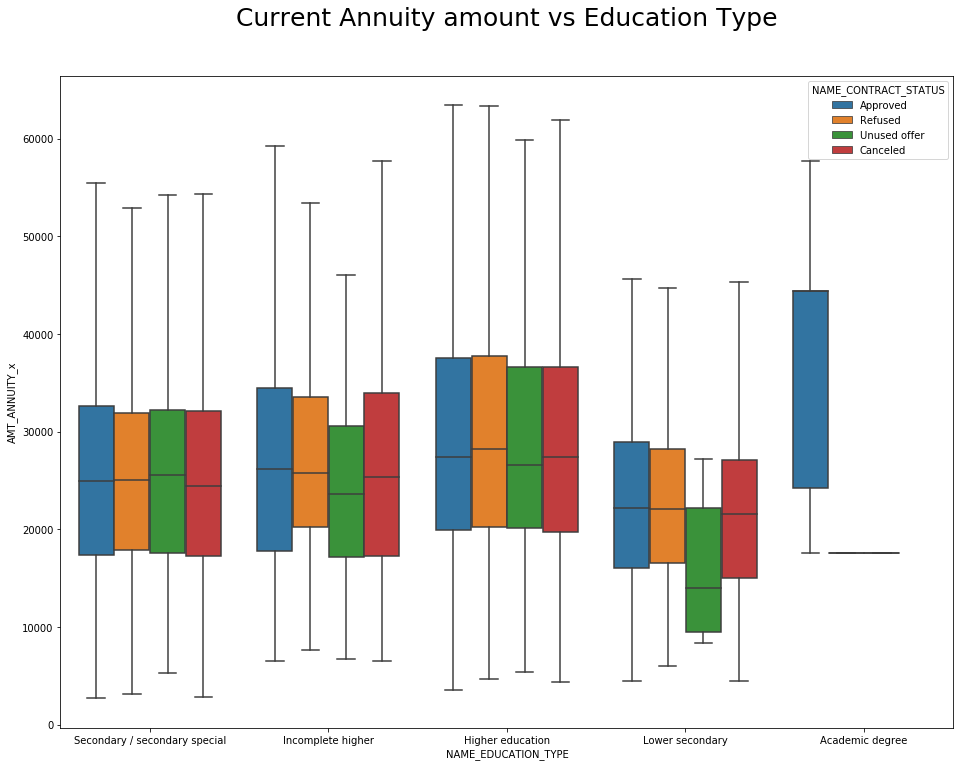

In [118]:
# Plotting Education type with Current Annuity amount for Target 1
plt.figure(figsize=(16,12))
sns.boxplot(data =mer_tar1, x='NAME_EDUCATION_TYPE', y='AMT_ANNUITY_x', hue ='NAME_CONTRACT_STATUS',showfliers=False)
plt.title('Current Annuity amount vs Education Type')
plt.show()

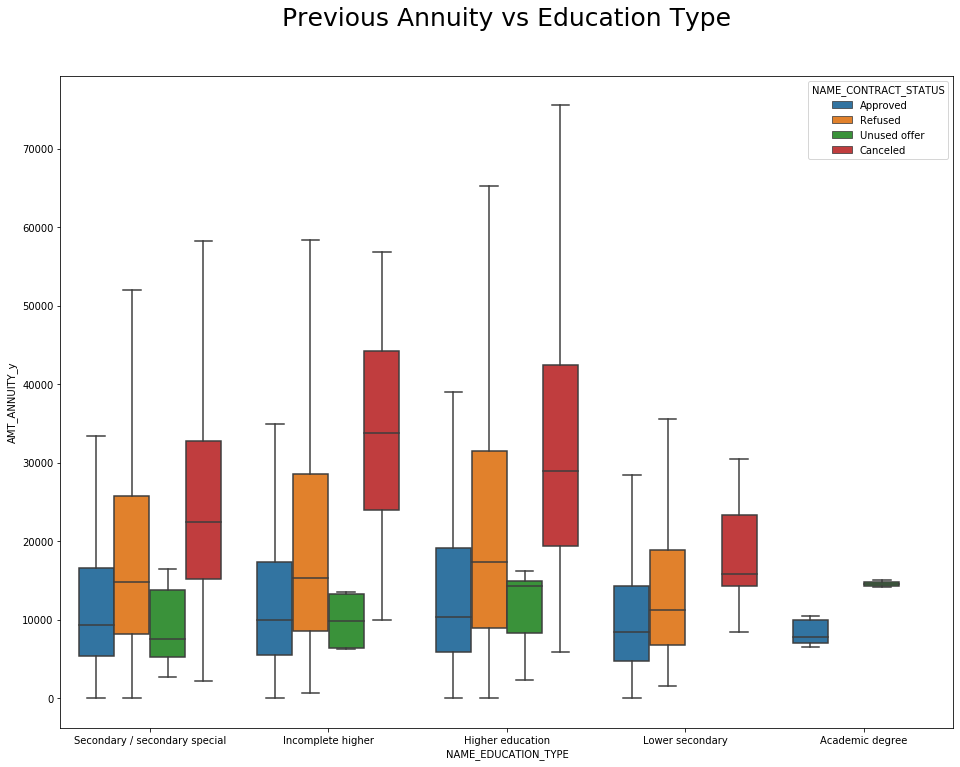

In [119]:
# Plotting Education type with Previous Annuity Amount for Target 1
plt.figure(figsize=(16,12))
sns.boxplot(data =mer_tar1, x='NAME_EDUCATION_TYPE', y='AMT_ANNUITY_y', hue ='NAME_CONTRACT_STATUS',showfliers=False)
plt.title('Previous Annuity vs Education Type')
plt.show()

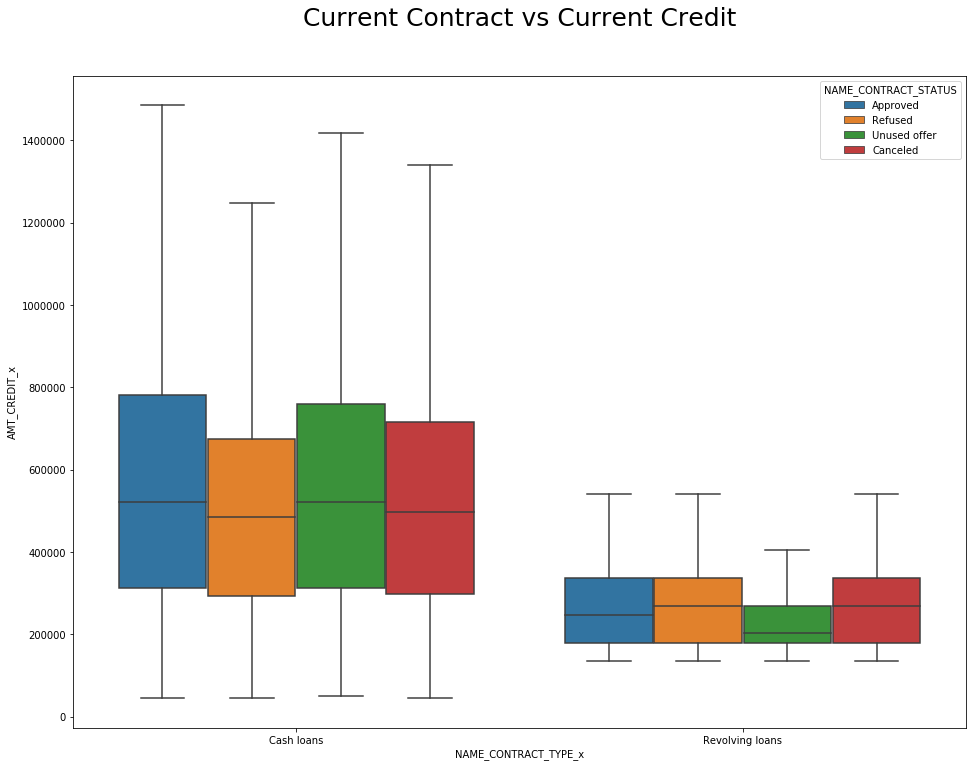

In [120]:
## Plotting current contract type with current credit for Target 1
plt.figure(figsize=(16,12))
sns.boxplot(data =mer_tar1, x='NAME_CONTRACT_TYPE_x', y='AMT_CREDIT_x', hue ='NAME_CONTRACT_STATUS',showfliers=False)
plt.title('Current Contract vs Current Credit')
plt.show()

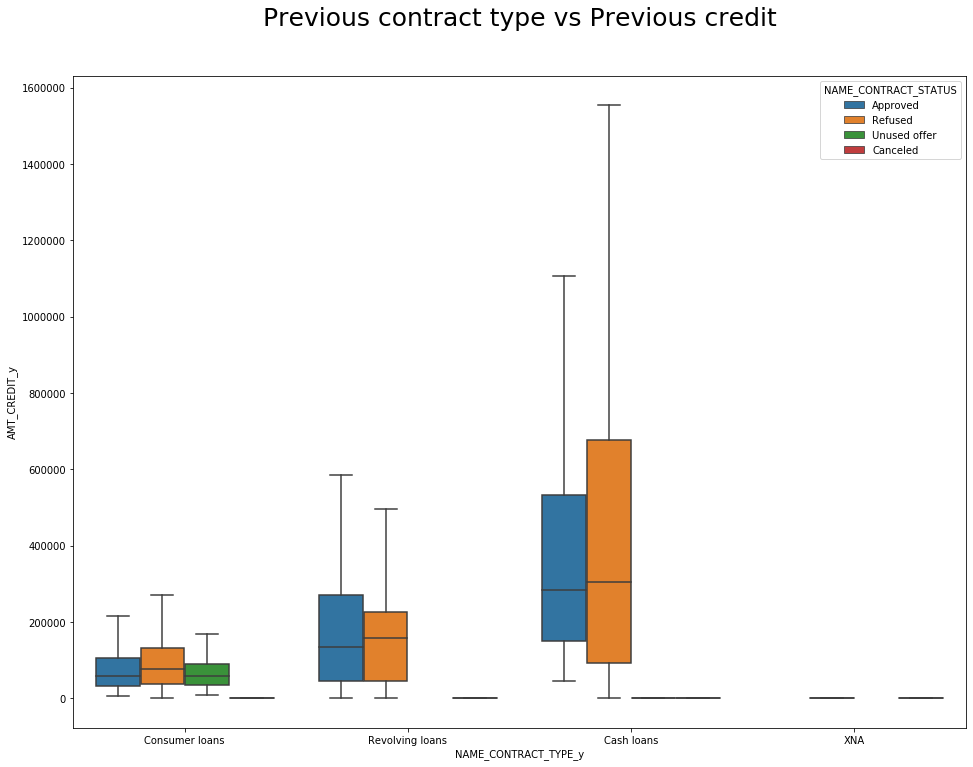

In [121]:
## Plotting previous contract type with previous credit for Target 1
plt.figure(figsize=(16,12))
sns.boxplot(data =mer_tar1, x='NAME_CONTRACT_TYPE_y', y='AMT_CREDIT_y', hue ='NAME_CONTRACT_STATUS',showfliers=False)
plt.title('Previous contract type vs Previous credit')
plt.show()

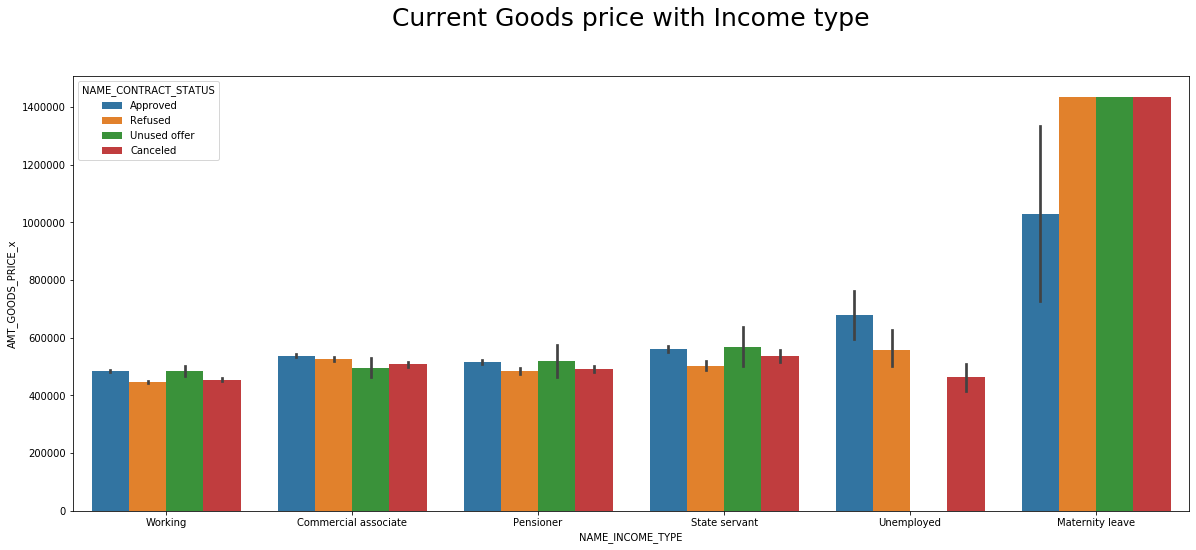

In [122]:
## Plotting current goods price with Income type for Target 1
plt.figure(figsize=(20,8))
sns.barplot(data =mer_tar1, x='NAME_INCOME_TYPE',hue='NAME_CONTRACT_STATUS',y='AMT_GOODS_PRICE_x')
plt.title('Current Goods price with Income type')
plt.show()

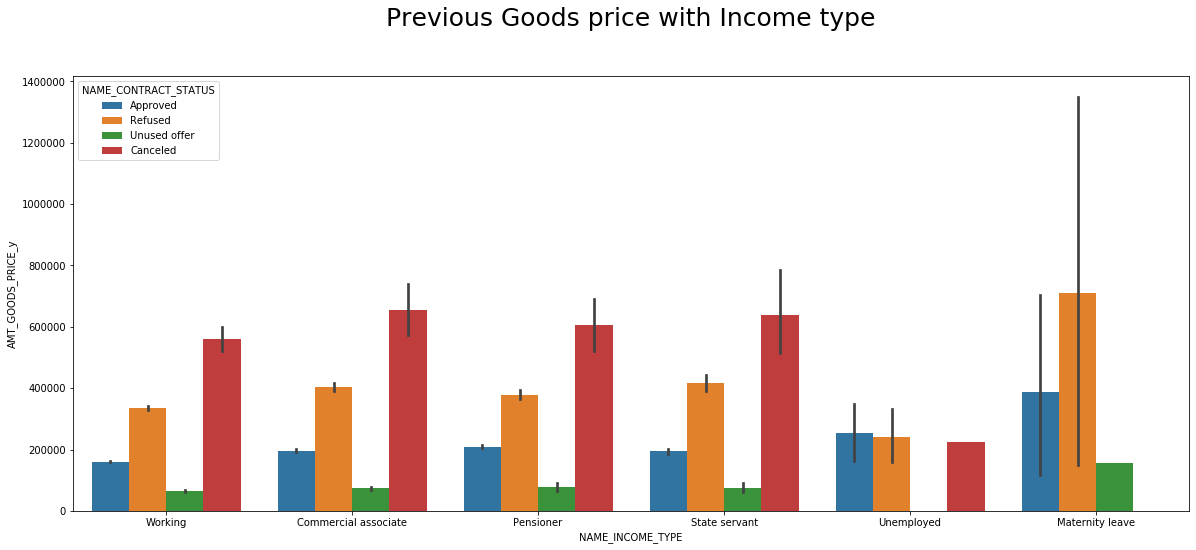

In [123]:
# Plotting previous goods price with income type for Target 1
plt.figure(figsize=(20,8))
sns.barplot(data =mer_tar1, x='NAME_INCOME_TYPE',hue='NAME_CONTRACT_STATUS',y='AMT_GOODS_PRICE_y')
plt.title('Previous Goods price with Income type')
plt.show()

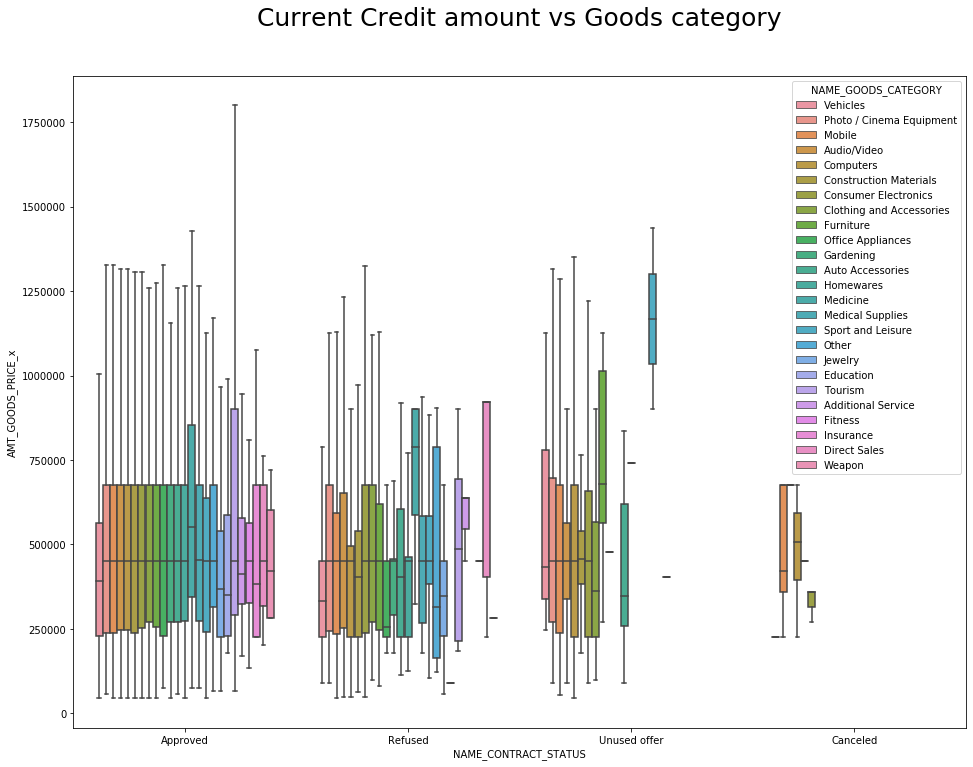

In [124]:
# Plotting Goods category with Current credit amount for Target 1
plt.figure(figsize=(16,12))
sns.boxplot(data =mer_tar1, hue='NAME_GOODS_CATEGORY', y='AMT_GOODS_PRICE_x', x='NAME_CONTRACT_STATUS',showfliers=False)
plt.title('Current Credit amount vs Goods category')
plt.show()

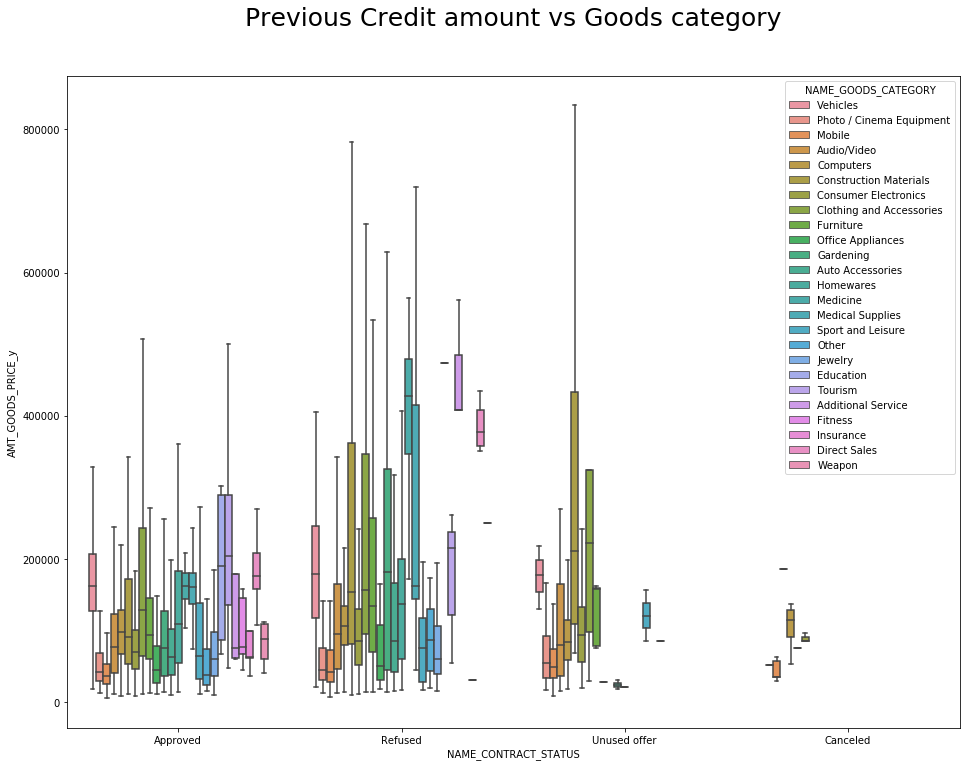

In [108]:
# Plotting Goods Category with Previous credit amount.
plt.figure(figsize=(16,12))
sns.boxplot(data =mer_tar1, hue='NAME_GOODS_CATEGORY', y='AMT_GOODS_PRICE_y', x='NAME_CONTRACT_STATUS',showfliers=False)
plt.title('Previous Credit amount vs Goods category')
plt.show()

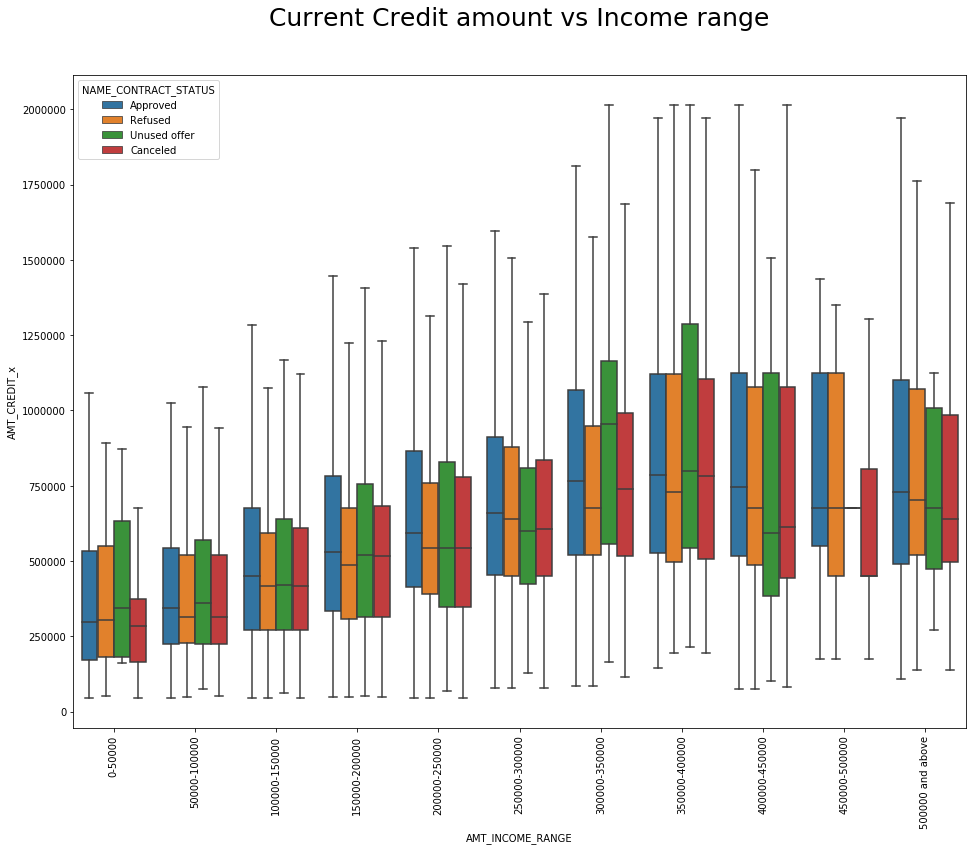

In [125]:
# Plotting Income range with Current credit amount for Target 1
plt.figure(figsize=(16,12))
sns.boxplot(data =mer_tar1, x='AMT_INCOME_RANGE', y='AMT_CREDIT_x', hue='NAME_CONTRACT_STATUS',showfliers=False)
plt.title('Current Credit amount vs Income range')
plt.xticks(rotation='vertical')
plt.show()

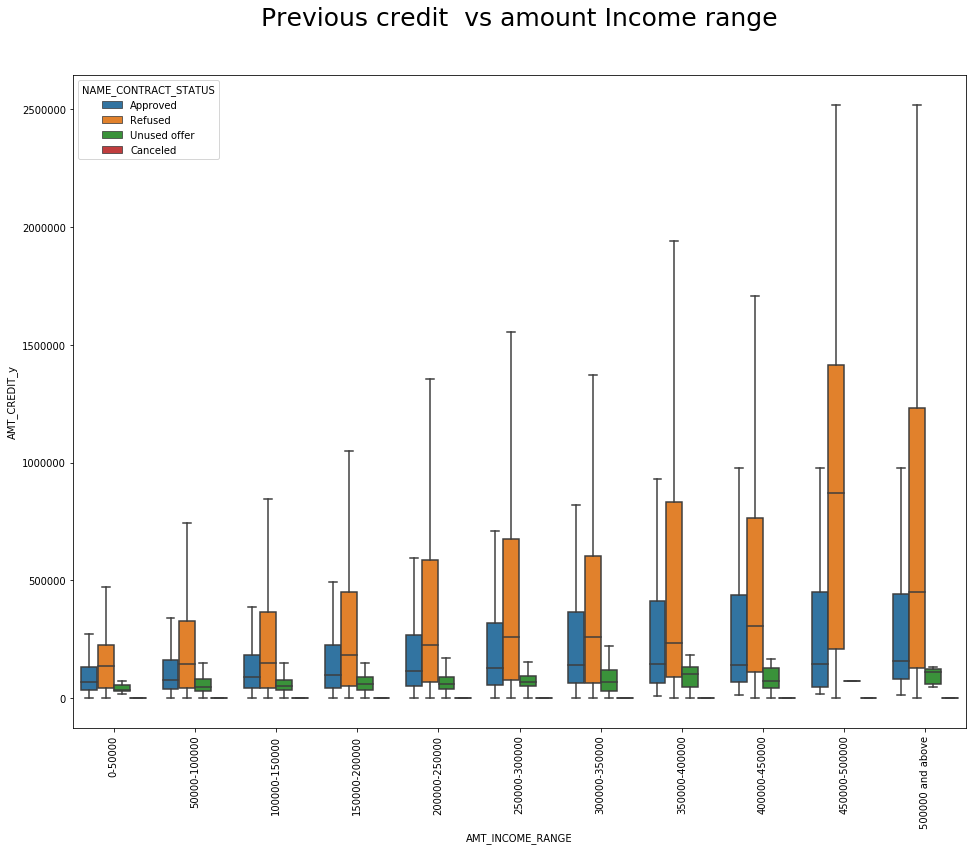

In [126]:
# Plotting Previous credit  with Income range for Target 1
plt.figure(figsize=(16,12))
sns.boxplot(data =mer_tar1, x='AMT_INCOME_RANGE', y='AMT_CREDIT_y', hue='NAME_CONTRACT_STATUS',showfliers=False)
plt.title('Previous credit  vs amount Income range')
plt.xticks(rotation='vertical')
plt.show()

Conclusion from above bivariate analysis
* Their credit amout has been increased as the result annuity amount also increased. 
*  Majority of credit amount starting range is 2.5 to 3 lakhs.
*  Academic degress holders has no refusal history.Previoulsy adacemic degree holder credit amount was very less  but in current application, their credit amount above 6 lakhs range.
*  Previously there were consumer loans now only revolving and cash loans.
*  More loan cancellation in previous application due to higher annuity. 
* The goods price is increased drastically for almost all the items. Previous approved loans are mostly below 2.5 lakhs worth commodity and in current application the range is from 2.5 lakhs to 7 lakhs above.
* Higher good price, loans are taking by  people who are on maternity leave.

### Case study final conclusion


* AMT_CREDIT(x and y), AMT_INCOME_TOTAL, DAYS_BIRT(Age group after imputing),NAME_CONTRACT_STATUS, 
  AMT_ANNUITY( x and y),NAM_INCOME_TYPE,Occupation and Organization types  are the major fields for analysis.
* The imbalance ratio is too high i.e non defaulters data is 11.38 times more than defaulters.
* Females are more tend to take loans. Among them widows and people who are on maternity leave tend to be more defaulters.
* Majority of loan are taking from age group 30 to 40.
* Married people are taking more loans.
* Most of people who are taking loans has either 0 or 1 children and they are live in House/Apt or with parents. 
* People are preferring more cash loans than revolving.
* Most of the loans are taking for repair works.
* Academic degree holders are asking more credit amount.
* Defaulters are mostly have secondary/special educaltion only.

While analysing the previoius application vs current application, we identified the below points why previously approved customers are now in defaulters list. 

* Amount Good price spreaded for all the items in current application w.r.t previous application.
* Amount Credit and Amount Annuity also increased from previous to current application.

**Plotted a boxplot below for more clarity**

It would be good if had a date field in the current and previous application file to see time period  on which this data is collected, so that we should had a better picture on why the goods price had increased.


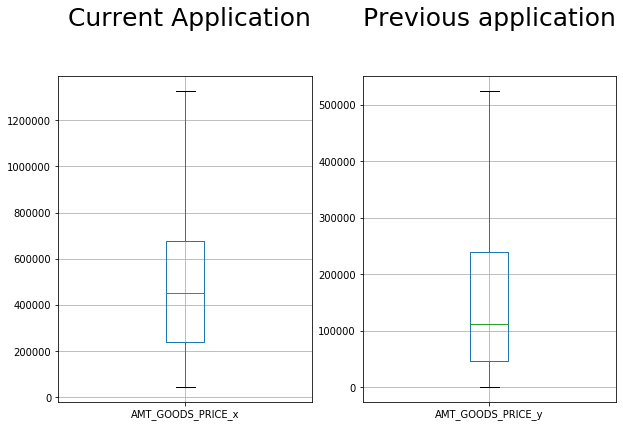

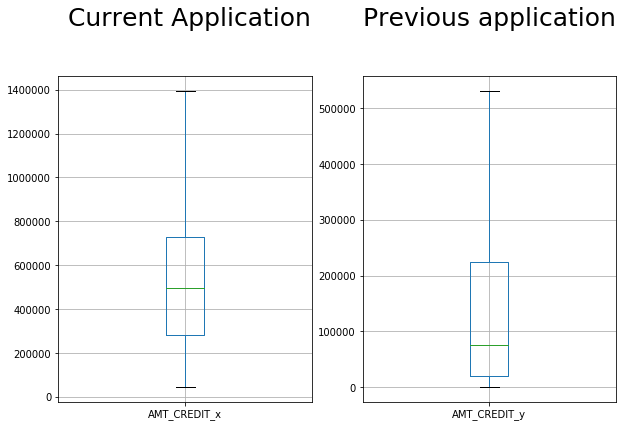

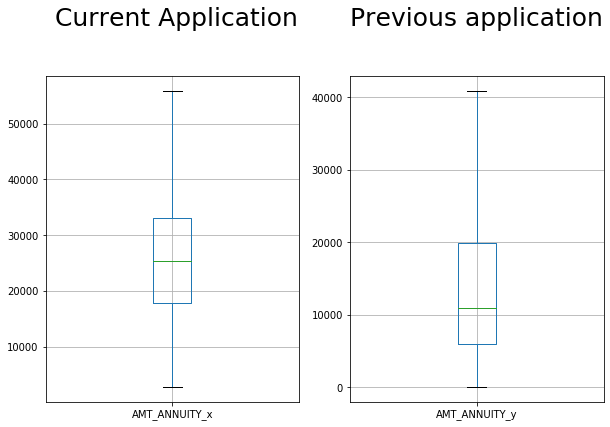

In [141]:
## Boxplot vizualisation on Amt fields ( x indicates current and y indicates previous)
col = ['AMT_GOODS_PRICE_x', 'AMT_GOODS_PRICE_y','AMT_CREDIT_x', 'AMT_CREDIT_y','AMT_ANNUITY_x','AMT_ANNUITY_y']
  # Plotting using box plot.. Removing the oulliers using showfliers command
i=0
for j in range(3):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    mer_tar1.boxplot(column=col[i],showfliers=False)
    plt.title(' Current Application')
    plt.subplot(1,2,2)
    mer_tar1.boxplot(column=col[i+1],showfliers=False)
    plt.title('Previous application')
    i=i+2

